# Seven years of Spotify Part Two: Cleaning & Analysis

This notebook dives deeper into my lifetime listening history with Spotify. Now that I have a complete dataset after the data extraction that took place in Part One, I've got a series of questions and curiousities I'm ready to explore: 
- How has the volume of my listening changed over time? 
- Which day of the week, and what time of day do I listen to songs the most? 
- How often am I skipping songs vs listening all the way through?
- Who are my top artists and what are my top tracks? 
- How popular are my top artists and tracks? 
- What are my favorite genres? 
- Do I have a preference for any of the various track features? (loudness, instumentalness, energy, etc.)

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import calplot
import seaborn as sns
%matplotlib inline

#This code is only necessary for viewing the graphs on github. 
#Comment out the code with pio.renderers to see the interactive graph
#height and width will be set for each display
import plotly.io as pio
pio.renderers.default = "png"


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## EDA

In [118]:
df = pd.read_csv('lifetime_spotify_tracks.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179565 entries, 0 to 179564
Data columns (total 38 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ts                                 179565 non-null  object 
 1   ms_played                          179565 non-null  int64  
 2   master_metadata_track_name         179063 non-null  object 
 3   master_metadata_album_artist_name  179063 non-null  object 
 4   master_metadata_album_album_name   179063 non-null  object 
 5   spotify_track_uri                  179063 non-null  object 
 6   reason_start                       179531 non-null  object 
 7   reason_end                         179531 non-null  object 
 8   shuffle                            179565 non-null  bool   
 9   skipped                            33837 non-null   float64
 10  offline                            179565 non-null  bool   
 11  offline_timestamp                  1795

In [119]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ms_played,179565.0,1.125437e+05,1.386310e+05,0.00000,1462.00000,7.541300e+04,2.109060e+05,5.813188e+06
skipped,33837.0,6.554955e-01,4.752135e-01,0.00000,0.00000,1.000000e+00,1.000000e+00,1.000000e+00
offline_timestamp,179565.0,1.101402e+12,7.362284e+11,0.00000,0.00000,1.551369e+12,1.627057e+12,1.663170e+12
track_popularity,179051.0,4.774644e+01,2.373500e+01,0.00000,35.00000,5.300000e+01,6.500000e+01,9.500000e+01
duration_ms,179051.0,2.254042e+05,5.274577e+04,0.00000,194716.00000,2.195000e+05,2.498130e+05,2.462986e+06
artist_popularity,179051.0,6.608453e+01,1.561775e+01,0.00000,58.00000,6.700000e+01,7.800000e+01,1.000000e+02
followers.total,179051.0,8.162241e+06,1.398664e+07,2.00000,388629.00000,1.822988e+06,1.002446e+07,1.054083e+08
album_popularity,179051.0,4.952872e+01,2.415729e+01,0.00000,37.00000,5.600000e+01,6.700000e+01,1.000000e+02
tracks.total,179051.0,1.250803e+01,8.768288e+00,1.00000,10.00000,1.200000e+01,1.500000e+01,5.020000e+02
danceability,179051.0,5.895167e-01,1.387005e-01,0.00000,0.50250,5.940000e-01,6.830000e-01,9.800000e-01


In [120]:
df.shape

(179565, 38)

In [121]:
df.tail().T

,179560,179561,179562,179563,179564
ts,2018-03-02T14:25:31Z,2019-03-05T03:59:02Z,2017-05-22T13:56:29Z,2016-04-19T14:50:36Z,2021-09-21T16:44:36Z
ms_played,227360,766,123692,770,1066
master_metadata_track_name,LOYALTY. FEAT. RIHANNA.,Alright,Contagious,Stronger (What Doesn't Kill You),Avalanche
master_metadata_album_artist_name,Kendrick Lamar,Kendrick Lamar,Night Riots,Kelly Clarkson,WALK THE MOON
master_metadata_album_album_name,DAMN.,To Pimp A Butterfly,Love Gloom,Greatest Hits - Chapter One,TALKING IS HARD
spotify_track_uri,spotify:track:6SwRhMLwNqEi6alNPVG00n,spotify:track:3iVcZ5G6tvkXZkZKlMpIUs,spotify:track:5cMcOsWB6Sasw8t6aprNtu,spotify:track:35a4Kzyo9XY4FI9FaSIzzF,spotify:track:3JxaZPq4UjkOaxnpyMUtAC
reason_start,clickrow,fwdbtn,clickrow,fwdbtn,fwdbtn
reason_end,trackdone,fwdbtn,endplay,fwdbtn,fwdbtn
shuffle,True,True,True,True,True
skipped,NaN,NaN,NaN,NaN,NaN


In [122]:
df.isna().sum()

ts                                        0
ms_played                                 0
master_metadata_track_name              502
master_metadata_album_artist_name       502
master_metadata_album_album_name        502
spotify_track_uri                       502
reason_start                             34
reason_end                               34
shuffle                                   0
skipped                              145728
offline                                   0
offline_timestamp                         0
incognito_mode                            0
track_uri                               514
album.uri                               514
artists.uri                             514
track_popularity                        514
duration_ms                             514
album.album_type                        514
album.release_date                      514
genres                                  514
artist_popularity                       514
followers.total                 

## Data Cleaning

### Initial thoughts:
- `ts` and `release_date` should be in datetime.

- `reason_start` and `reason_end` should be categorical. There's a few missing values here, but we can likely determine some based on comparing `ms_played` and `duration_ms`, because if those two columns are equal, that means the track completed. 

- `skipped` is mostly missing values, it can be deduced from the number of completed tracks using the same method in the point above.

- `spotify_track_uri` and `track_uri` largely contain the same data, but the latter has 12 missing values. I bet this is related to the many other columns that have 12 missing values.

- There are a handful of missing values for `label`, which likely indicates there isn't a record label for those tracks.

### Formatting columns with dates

In [123]:
#only need the year for album release date
df['album.release_date'] = pd.to_datetime(df['album.release_date'], errors='coerce').dt.year
df['ts'] = pd.to_datetime(df['ts'].str.replace('Z', ''), format='%Y-%m-%d %H:%M:%S')
df[['ts','album.release_date']].dtypes

ts                    datetime64[ns]
album.release_date           float64
dtype: object

### Reasons for start/end

In [124]:
#values in reason_start/end
print(df['reason_start'].value_counts())
print()
print(df['reason_end'].value_counts())

trackdone     75536
fwdbtn        72653
clickrow      20536
backbtn        6565
playbtn        2187
appload        1506
remote          383
unknown         109
trackerror       49
endplay           7
Name: reason_start, dtype: int64

trackdone                       76589
fwdbtn                          72631
endplay                         19297
backbtn                          6560
unexpected-exit-while-paused     2188
logout                           1185
remote                            492
unexpected-exit                   257
unknown                           154
clickrow                          128
trackerror                         38
appload                            12
Name: reason_end, dtype: int64


We can check for whether `track_ms` is equal to `duration_ms`, otherwise we can say the reason is unknown.

In [125]:
#sorting the df chronologically
df = df.sort_values('ts', ascending=True).reset_index(drop=True) 
df.head()

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode,track_uri,album.uri,artists.uri,track_popularity,duration_ms,album.album_type,album.release_date,genres,artist_popularity,followers.total,album_popularity,label,tracks.total,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2015-01-29 16:41:06,241253,Portugal,WALK THE MOON,TALKING IS HARD,spotify:track:3MYWKl8ScgDu3sAvyneMCG,trackdone,trackdone,True,0.0,False,0,False,spotify:track:3MYWKl8ScgDu3sAvyneMCG,spotify:album:3mNoFlD1wsoXfkljfFzExT,spotify:artist:6DIS6PRrLS3wbnZsf7vYic,46.0,241253.0,album,2014.0,"['dance rock', 'indie poptimism', 'modern alte...",67.0,1986969.0,72.0,RCA Records Label,12.0,0.446,0.881,2.0,-4.368,1.0,0.0545,0.00749,0.000000,0.1300,0.415,169.889,4.0
1,2015-01-29 16:45:06,240000,Aquaman,WALK THE MOON,TALKING IS HARD,spotify:track:71wT7aMCFPYfzutF66OLac,trackdone,trackdone,True,0.0,False,0,False,spotify:track:71wT7aMCFPYfzutF66OLac,spotify:album:3mNoFlD1wsoXfkljfFzExT,spotify:artist:6DIS6PRrLS3wbnZsf7vYic,42.0,240000.0,album,2014.0,"['dance rock', 'indie poptimism', 'modern alte...",67.0,1986969.0,72.0,RCA Records Label,12.0,0.630,0.772,1.0,-6.986,1.0,0.0297,0.51000,0.000023,0.0881,0.721,99.964,4.0
2,2015-01-29 16:48:29,201839,Up 2 U,WALK THE MOON,TALKING IS HARD,spotify:track:5OWZ4qbW7bYQTGIKRbSvxA,trackdone,trackdone,True,0.0,False,0,False,spotify:track:5OWZ4qbW7bYQTGIKRbSvxA,spotify:album:3mNoFlD1wsoXfkljfFzExT,spotify:artist:6DIS6PRrLS3wbnZsf7vYic,36.0,201840.0,album,2014.0,"['dance rock', 'indie poptimism', 'modern alte...",67.0,1986969.0,72.0,RCA Records Label,12.0,0.641,0.688,7.0,-5.140,1.0,0.0318,0.00653,0.000003,0.1780,0.495,97.973,4.0
3,2015-01-29 16:53:50,321280,Anna Sun,WALK THE MOON,Walk The Moon,spotify:track:3e0yTP5trHBBVvV32jwXqF,trackdone,trackdone,True,0.0,False,0,False,spotify:track:3e0yTP5trHBBVvV32jwXqF,spotify:album:1QhonXpNQq8wrGEKX0ofbk,spotify:artist:6DIS6PRrLS3wbnZsf7vYic,62.0,321280.0,album,2012.0,"['dance rock', 'indie poptimism', 'modern alte...",67.0,1986969.0,55.0,RCA Records Label,11.0,0.472,0.844,10.0,-6.578,1.0,0.0540,0.00173,0.000000,0.2400,0.340,140.034,4.0
4,2015-01-29 16:53:56,5247,Anna Sun - Live From Spotify NYC,WALK THE MOON,Spotify Sessions,spotify:track:3Syg4GwsW6yFeTbZUqWvYS,trackdone,fwdbtn,True,1.0,False,0,False,spotify:track:3Syg4GwsW6yFeTbZUqWvYS,spotify:album:2ZVVL0EtfIBqPAGZ4TQOsI,spotify:artist:6DIS6PRrLS3wbnZsf7vYic,31.0,287040.0,single,2012.0,"['dance rock', 'indie poptimism', 'modern alte...",67.0,1986969.0,21.0,RCA Records Label,3.0,0.542,0.656,10.0,-10.246,1.0,0.1270,0.33000,0.000000,0.6670,0.558,139.473,4.0


In [126]:
#if the track was completed, fill reason END with trackdone
df.loc[(df['reason_end']).isna() & (df['ms_played'] == df['duration_ms']), 'reason_end'] = 'trackdone'
#if the row above a missing start reason has a completed track, fill reason START with trackdone
df.loc[(df['reason_start'].isna()) & (df.shift()['ms_played'] == df.shift()['duration_ms']), 'reason_start'] = 'trackdone'
#otherwise, it's unknown 
df[['reason_start', 'reason_end']] = df[['reason_start', 'reason_end']].fillna('unknown')
#cement dtype as categorical
df[['reason_start', 'reason_end']] = df[['reason_start', 'reason_end']].astype('category')
df.isna().sum()

ts                                        0
ms_played                                 0
master_metadata_track_name              502
master_metadata_album_artist_name       502
master_metadata_album_album_name        502
spotify_track_uri                       502
reason_start                              0
reason_end                                0
shuffle                                   0
skipped                              145728
offline                                   0
offline_timestamp                         0
incognito_mode                            0
track_uri                               514
album.uri                               514
artists.uri                             514
track_popularity                        514
duration_ms                             514
album.album_type                        514
album.release_date                      522
genres                                  514
artist_popularity                       514
followers.total                 

### Whether a song is skipped

In [127]:
df['skipped'].value_counts()

1.0    22180
0.0    11657
Name: skipped, dtype: int64

In [128]:
#confirming skipped is true when the value is 1
df[df['skipped'] == 1][['ms_played', 'duration_ms']].head()

,ms_played,duration_ms
4,5247,287040.0
8,78251,218720.0
10,17693,220200.0
12,6505,269466.0
13,2859,257093.0


The `skipped` column shouldn't have missing values. If we take the value for completed tracks in `reason_end`, this column should be completely filled.

In [129]:
df.loc[df['reason_end'] == 'trackdone', 'skipped'] = False
df.loc[df['reason_end'] != 'trackdone', 'skipped'] = True
df['skipped'] = df['skipped'].astype('bool')
df['skipped'].isna().sum()

0

### Missing track URIs

In [130]:
df[df['track_uri'].isna()]

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode,track_uri,album.uri,artists.uri,track_popularity,duration_ms,album.album_type,album.release_date,genres,artist_popularity,followers.total,album_popularity,label,tracks.total,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
4310,2015-09-16 22:58:59,10309,Take on Me,a-ha,Hunting High and Low,spotify:track:5zKBRr9OLhGu9HKuLb9vWy,fwdbtn,fwdbtn,True,True,False,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4312,2015-09-16 23:00:11,72097,Take on Me,a-ha,Hunting High and Low,spotify:track:5zKBRr9OLhGu9HKuLb9vWy,backbtn,fwdbtn,True,True,False,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4525,2015-09-17 15:30:33,1950,Take on Me,a-ha,Hunting High and Low,spotify:track:5zKBRr9OLhGu9HKuLb9vWy,fwdbtn,fwdbtn,True,True,False,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5086,2015-09-21 02:22:59,2275,Take on Me,a-ha,Hunting High and Low,spotify:track:5zKBRr9OLhGu9HKuLb9vWy,fwdbtn,fwdbtn,True,True,False,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64015,2017-11-21 00:15:18,145264,The Fresh Prince of Bel-Air,DJ Jazzy Jeff & The Fresh Prince,Greatest Hits,spotify:track:0UamYFMTFVDycYxDufBZSp,clickrow,endplay,True,True,False,1511223172328,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168088,2022-06-03 15:54:49,1799700,NaN,NaN,NaN,NaN,remote,endplay,False,True,False,1654268053194,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168678,2022-06-08 15:56:56,1844762,NaN,NaN,NaN,NaN,trackdone,trackdone,True,False,False,1654701971098,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168708,2022-06-08 17:08:13,0,NaN,NaN,NaN,NaN,fwdbtn,fwdbtn,True,True,False,1654708092279,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169103,2022-06-11 12:52:55,1962617,NaN,NaN,NaN,NaN,trackdone,logout,True,True,False,1654790183823,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There's only two songs to deal with, and the right data is in a different column, it just needs to be duplicated WITHOUT adjusting the `ts` or `ms_played` columns.

But why is this happening?

In [131]:
df[(df['master_metadata_track_name'] == 'Take on Me') & (df['master_metadata_album_artist_name'] == 'a-ha')].head(10)

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode,track_uri,album.uri,artists.uri,track_popularity,duration_ms,album.album_type,album.release_date,genres,artist_popularity,followers.total,album_popularity,label,tracks.total,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
2271,2015-09-03 15:01:14,2461,Take on Me,a-ha,Hunting High and Low,spotify:track:2WfaOiMkCvy7F5fcp2zZ8L,clickrow,fwdbtn,True,True,False,0,False,spotify:track:2WfaOiMkCvy7F5fcp2zZ8L,spotify:album:1ER3B6zev5JEAaqhnyyfbf,spotify:artist:2jzc5TC5TVFLXQlBNiIUzE,85.0,225280.0,album,1985.0,"['new romantic', 'new wave', 'new wave pop', '...",70.0,1870472.0,74.0,Rhino,10.0,0.573,0.902,6.0,-7.638,0.0,0.054,0.018,0.00125,0.0928,0.876,84.412,4.0
2272,2015-09-03 15:01:14,2461,Take on Me,a-ha,Hunting High and Low,spotify:track:2WfaOiMkCvy7F5fcp2zZ8L,clickrow,fwdbtn,True,True,False,0,False,spotify:track:2WfaOiMkCvy7F5fcp2zZ8L,spotify:album:1ER3B6zev5JEAaqhnyyfbf,spotify:artist:2jzc5TC5TVFLXQlBNiIUzE,85.0,225280.0,album,1985.0,"['new romantic', 'new wave', 'new wave pop', '...",70.0,1870472.0,74.0,Rhino,10.0,0.573,0.902,6.0,-7.638,0.0,0.054,0.018,0.00125,0.0928,0.876,84.412,4.0
4310,2015-09-16 22:58:59,10309,Take on Me,a-ha,Hunting High and Low,spotify:track:5zKBRr9OLhGu9HKuLb9vWy,fwdbtn,fwdbtn,True,True,False,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4312,2015-09-16 23:00:11,72097,Take on Me,a-ha,Hunting High and Low,spotify:track:5zKBRr9OLhGu9HKuLb9vWy,backbtn,fwdbtn,True,True,False,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4525,2015-09-17 15:30:33,1950,Take on Me,a-ha,Hunting High and Low,spotify:track:5zKBRr9OLhGu9HKuLb9vWy,fwdbtn,fwdbtn,True,True,False,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5086,2015-09-21 02:22:59,2275,Take on Me,a-ha,Hunting High and Low,spotify:track:5zKBRr9OLhGu9HKuLb9vWy,fwdbtn,fwdbtn,True,True,False,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16725,2015-12-31 21:44:31,16811,Take on Me,a-ha,Hunting High and Low,spotify:track:2WfaOiMkCvy7F5fcp2zZ8L,clickrow,endplay,False,True,False,0,False,spotify:track:2WfaOiMkCvy7F5fcp2zZ8L,spotify:album:1ER3B6zev5JEAaqhnyyfbf,spotify:artist:2jzc5TC5TVFLXQlBNiIUzE,85.0,225280.0,album,1985.0,"['new romantic', 'new wave', 'new wave pop', '...",70.0,1870472.0,74.0,Rhino,10.0,0.573,0.902,6.0,-7.638,0.0,0.054,0.018,0.00125,0.0928,0.876,84.412,4.0
16726,2015-12-31 21:44:31,16811,Take on Me,a-ha,Hunting High and Low,spotify:track:2WfaOiMkCvy7F5fcp2zZ8L,clickrow,endplay,False,True,False,0,False,spotify:track:2WfaOiMkCvy7F5fcp2zZ8L,spotify:album:1ER3B6zev5JEAaqhnyyfbf,spotify:artist:2jzc5TC5TVFLXQlBNiIUzE,85.0,225280.0,album,1985.0,"['new romantic', 'new wave', 'new wave pop', '...",70.0,1870472.0,74.0,Rhino,10.0,0.573,0.902,6.0,-7.638,0.0,0.054,0.018,0.00125,0.0928,0.876,84.412,4.0
16727,2015-12-31 21:49:07,255881,Take on Me,a-ha,Hunting High and Low,spotify:track:2WfaOiMkCvy7F5fcp2zZ8L,clickrow,trackdone,False,False,False,0,False,spotify:track:2WfaOiMkCvy7F5fcp2zZ8L,spotify:album:1ER3B6zev5JEAaqhnyyfbf,spotify:artist:2jzc5TC5TVFLXQlBNiIUzE,85.0,225280.0,album,1985.0,"['new romantic', 'new wave', 'new wave pop', '...",70.0,1870472.0,74.0,Rhino,10.0,0.573,0.902,6.0,-7.638,0.0,0.054,0.018,0.00125,0.0928,0.876,84.412,4.0
16728,2015-12-31 21:49:07,255881,Take on Me,a-ha,Hunting High and Low,spotify:track:2WfaOiMkCvy7F5fcp2zZ8L,clickrow,trackdone,False,False,False,0,False,spotify:track:2WfaOiMkCvy7F5fcp2zZ8L,spotify:album:1ER3B6zev5JEAaqhnyyfbf,spotify:artist:2jzc5TC5TVFLXQlBNiIUzE,85.0,225280.0,album,1985.0,"['new romantic', 'new wave', 'new wav

Turns out, this data goes back far enough that there are two different URIs for each of the two songs. Spotify must have changed the identifier sometime between Sept. and Dec. 2015.

It's a fairly easy fix to fill in missing values for the same song where it was played with the up-to-date URI. 

In [132]:
#locate the rows for the song where track features are missing
mask_na = (df['master_metadata_track_name'] == 'Take on Me') & (df['master_metadata_album_artist_name'] == 'a-ha') & (df['track_uri'].isna())
#standardize the uri for the song
df.loc[mask_na, 'spotify_track_uri'] = 'spotify:track:2WfaOiMkCvy7F5fcp2zZ8L'
#finding the values in Take on Me to update the nulls with
mask_notna = (df['master_metadata_track_name'] == 'Take on Me') & (df['master_metadata_album_artist_name'] == 'a-ha') & (df['track_uri'].notna())
take_on_me_update = df.loc[mask_notna, df.columns[13:]]
df.loc[mask_na, df.columns[13:]] = [take_on_me_update.iloc[0]]
df[df['track_uri'].isna()]

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode,track_uri,album.uri,artists.uri,track_popularity,duration_ms,album.album_type,album.release_date,genres,artist_popularity,followers.total,album_popularity,label,tracks.total,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
64015,2017-11-21 00:15:18,145264,The Fresh Prince of Bel-Air,DJ Jazzy Jeff & The Fresh Prince,Greatest Hits,spotify:track:0UamYFMTFVDycYxDufBZSp,clickrow,endplay,True,True,False,1511223172328,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74397,2018-07-05 20:28:48,4095641,NaN,NaN,NaN,NaN,clickrow,trackdone,False,False,False,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74398,2018-07-05 20:33:13,265729,NaN,NaN,NaN,NaN,trackdone,trackdone,False,False,False,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74399,2018-07-05 20:53:42,1230100,NaN,NaN,NaN,NaN,clickrow,trackdone,False,False,False,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74400,2018-07-06 00:12:23,2990637,NaN,NaN,NaN,NaN,clickrow,trackdone,False,False,False,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168088,2022-06-03 15:54:49,1799700,NaN,NaN,NaN,NaN,remote,endplay,False,True,False,1654268053194,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168678,2022-06-08 15:56:56,1844762,NaN,NaN,NaN,NaN,trackdone,trackdone,True,False,False,1654701971098,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168708,2022-06-08 17:08:13,0,NaN,NaN,NaN,NaN,fwdbtn,fwdbtn,True,True,False,1654708092279,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169103,2022-06-11 12:52:55,1962617,NaN,NaN,NaN,NaN,trackdone,logout,True,True,False,1654790183823,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
#Fresh Prince has the same problem
fp_ba = (df['master_metadata_track_name'] == 'The Fresh Prince of Bel-Air') & (df['track_uri'].isna())
fp_ba_notna = (df['master_metadata_track_name'] == 'The Fresh Prince of Bel-Air') & (df['track_uri'].notna())
fp_ba_update = df.loc[fp_ba_notna, df.columns[13:]]
#similarly updating the old uri
df.loc[fp_ba, 'spotify_track_uri'] = 'spotify:track:0UREO3QWbXJW3gOUXpK1am'
df.loc[fp_ba, df.columns[13:]] = [fp_ba_update.iloc[0]]
df[df['track_uri'].isna()]

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode,track_uri,album.uri,artists.uri,track_popularity,duration_ms,album.album_type,album.release_date,genres,artist_popularity,followers.total,album_popularity,label,tracks.total,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
74397,2018-07-05 20:28:48,4095641,NaN,NaN,NaN,NaN,clickrow,trackdone,False,False,False,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74398,2018-07-05 20:33:13,265729,NaN,NaN,NaN,NaN,trackdone,trackdone,False,False,False,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74399,2018-07-05 20:53:42,1230100,NaN,NaN,NaN,NaN,clickrow,trackdone,False,False,False,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74400,2018-07-06 00:12:23,2990637,NaN,NaN,NaN,NaN,clickrow,trackdone,False,False,False,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74401,2018-07-06 00:13:50,87214,NaN,NaN,NaN,NaN,clickrow,trackdone,False,False,False,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168088,2022-06-03 15:54:49,1799700,NaN,NaN,NaN,NaN,remote,endplay,False,True,False,1654268053194,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168678,2022-06-08 15:56:56,1844762,NaN,NaN,NaN,NaN,trackdone,trackdone,True,False,False,1654701971098,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168708,2022-06-08 17:08:13,0,NaN,NaN,NaN,NaN,fwdbtn,fwdbtn,True,True,False,1654708092279,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169103,2022-06-11 12:52:55,1962617,NaN,NaN,NaN,NaN,trackdone,logout,True,True,False,1654790183823,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The rest of these aren't songs, so they can be dropped.

In [134]:
df.dropna(subset=['track_uri'], inplace=True)
df.isna().sum()

ts                                    0
ms_played                             0
master_metadata_track_name            0
master_metadata_album_artist_name     0
master_metadata_album_album_name      0
spotify_track_uri                     0
reason_start                          0
reason_end                            0
shuffle                               0
skipped                               0
offline                               0
offline_timestamp                     0
incognito_mode                        0
track_uri                             0
album.uri                             0
artists.uri                           0
track_popularity                      0
duration_ms                           0
album.album_type                      0
album.release_date                    8
genres                                0
artist_popularity                     0
followers.total                       0
album_popularity                      0
label                                18


In [135]:
#final check that all URIs line up
df['track_uri'].equals(df['spotify_track_uri'])

True

In [136]:
#now we can get rid of the longer column
df.drop(columns=['spotify_track_uri'], axis=1, inplace=True)

### Missing album release dates and record labels

In [137]:
df[df['album.release_date'].isna()]

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode,track_uri,album.uri,artists.uri,track_popularity,duration_ms,album.album_type,album.release_date,genres,artist_popularity,followers.total,album_popularity,label,tracks.total,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
69353,2018-03-04 10:12:44,11470,Return of Infinity,Becca,Return of Infinity,clickrow,endplay,True,True,False,1520158350710,False,spotify:track:2Vrtd9aLbni8sI8RV1lmwh,spotify:album:0R3x2hhsfXf78GQSOmraRW,spotify:artist:0LyfQWJT6nXafLPZqxe9Of,0.0,0.0,single,NaN,[],0.0,1666724.0,0.0,NaN,1.0,0.374,0.00905,2.0,-22.653,1.0,0.0552,0.995,0.928,0.1090,0.405,76.574,3.0
70036,2018-03-15 05:41:31,17902,Friendship Before Love,Cellophane Roses,Friendship Before Love,fwdbtn,endplay,True,True,False,1521092473225,False,spotify:track:2dv7Jf570NkaWlW7NcsYTa,spotify:album:3cLc111KUDzsZL1uFCgwlC,spotify:artist:0LyfQWJT6nXafLPZqxe9Of,0.0,0.0,single,NaN,[],0.0,1666724.0,0.0,NaN,1.0,0.522,0.00251,9.0,-23.464,1.0,0.1120,0.994,0.960,0.0891,0.732,72.002,4.0
70038,2018-03-15 05:42:01,8823,Tallis One,Samuel Lindon,Tallis One,clickrow,endplay,True,True,False,1521092512389,False,spotify:track:0CQskMydQ8AhtKhJUAolvE,spotify:album:00pbGdcaCjW6gnZzuQe1bx,spotify:artist:0LyfQWJT6nXafLPZqxe9Of,0.0,0.0,single,NaN,[],0.0,1666724.0,0.0,NaN,1.0,0.410,0.01990,0.0,-26.699,1.0,0.0449,0.993,0.949,0.0897,0.178,107.378,4.0
70039,2018-03-15 05:43:39,97012,Friendship Before Love,Cellophane Roses,Friendship Before Love,clickrow,fwdbtn,False,True,False,1521092521347,False,spotify:track:2dv7Jf570NkaWlW7NcsYTa,spotify:album:3cLc111KUDzsZL1uFCgwlC,spotify:artist:0LyfQWJT6nXafLPZqxe9Of,0.0,0.0,single,NaN,[],0.0,1666724.0,0.0,NaN,1.0,0.522,0.00251,9.0,-23.464,1.0,0.1120,0.994,0.960,0.0891,0.732,72.002,4.0
70040,2018-03-15 05:44:12,33041,Celtic Cowboy,Charlotte Funke,Celtic Cowboy,fwdbtn,fwdbtn,True,True,False,1521092618406,False,spotify:track:7BX9pdIbf4LkCIWmFYp3tN,spotify:album:4z3XQTAvVHDCZYAqrOJZpl,spotify:artist:0LyfQWJT6nXafLPZqxe9Of,0.0,0.0,single,NaN,[],0.0,1666724.0,0.0,NaN,1.0,0.530,0.00457,5.0,-29.524,1.0,0.0455,0.994,0.968,0.0984,0.483,82.969,4.0
70044,2018-03-15 05:46:28,3529,Evening Mantra,Wilma Harrods,Evening Mantra,clickrow,endplay,True,True,False,1521092783992,False,spotify:track:2fJBBSR5r1n5nBvjDFy4lA,spotify:album:0nDOVwXUniefckDUugx5sP,spotify:artist:0LyfQWJT6nXafLPZqxe9Of,0.0,0.0,single,NaN,[],0.0,1666724.0,0.0,NaN,1.0,0.601,0.02350,9.0,-26.426,1.0,0.0525,0.991,0.967,0.1060,0.346,79.929,4.0
70045,2018-03-15 05:46:33,5317,Stillness Speaks,Yuki Sakura,Stillness Speaks,clickrow,endplay,True,True,False,1521092787627,False,spotify:track:3fzTpBMSQKjo9sW0T8Tw2O,spotify:album:06WcF7ukOWh3eGExZI0XlM,spotify:artist:0LyfQWJT6nXafLPZqxe9Of,0.0,0.0,single,NaN,[],0.0,1666724.0,0.0,NaN,1.0,0.419,0.00181,3.0,-33.652,1.0,0.0408,0.993,0.927,0.1380,0.146,69.862,4.0
71222,2018-04-10 19:46:00,187301,Longevity,Novo Talos,Longevity,trackdone,trackdone,True,False,False,1523389378154,False,spotify:track:4Aq7uO12FRC7JnLqY4T7Z7,spotify:album:2hGzgUz7lBVvXlDft2lmlb,spotify:artist:0LyfQWJT6nXafLPZqxe9Of,0.0,0.0,single,NaN,[],0.0,1666724.0,0.0,NaN,1.0,0.329,0.05900,3.0,-24.218,1.0,0.0348,0.995,0.904,0.1090,0.148,72.152,4.0


The missing values in `album.release_date` also have 0s for `duration_ms` and for both popularity columns. There's something amiss here, and it's best to drop them, as these eight rows don't have a big impact on the broader dataset. 

In [138]:
df.dropna(subset=['album.release_date'], inplace=True)
#label is a pretty easy one, the artist is independent
df.loc[df['label'].isna(), 'label'] = 'No Label'

df.isna().sum()

ts                                   0
ms_played                            0
master_metadata_track_name           0
master_metadata_album_artist_name    0
master_metadata_album_album_name     0
reason_start                         0
reason_end                           0
shuffle                              0
skipped                              0
offline                              0
offline_timestamp                    0
incognito_mode                       0
track_uri                            0
album.uri                            0
artists.uri                          0
track_popularity                     0
duration_ms                          0
album.album_type                     0
album.release_date                   0
genres                               0
artist_popularity                    0
followers.total                      0
album_popularity                     0
label                                0
tracks.total                         0
danceability             

In [139]:
df.to_csv('lifetime_spotify_clean.csv', index=False)

## Data Visualization

### General listening over time

In [140]:
df['day'] = df['ts'].dt.date
df['hour'] = df['ts'].dt.hour
df['minutes_played'] = df['ms_played']/60000

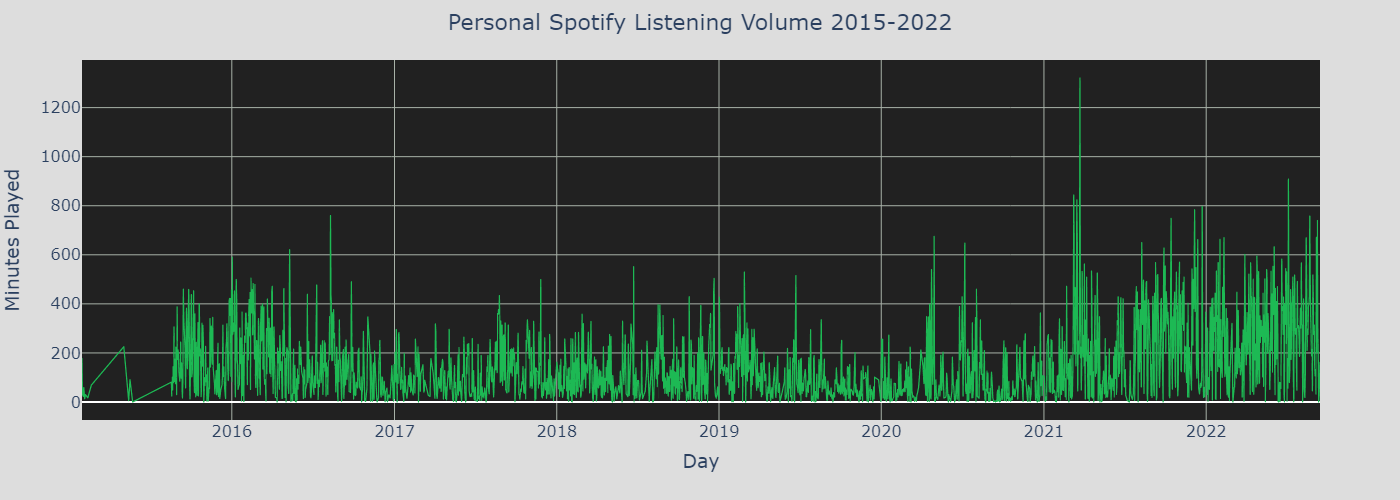

In [141]:
#daily listening in mins
pio.renderers['png'].height, pio.renderers['png'].width = 500, 1400
daily_mins = df.groupby('day').agg({'minutes_played': 'sum'}).reset_index()
fig = px.line(
    daily_mins, 
    x='day', 
    y='minutes_played',
    labels={'day':'Day', 'minutes_played':'Minutes Played'})
fig.update_traces(line=dict(color='#1DB954', width=1.25))
fig.update_layout(title_text='Personal Spotify Listening Volume 2015-2022', 
                  title_x=0.5, 
                  font_size=16, 
                  plot_bgcolor='#212121', 
                  paper_bgcolor='#dddddd')
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='#a8b2a8')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='#a8b2a8')
fig.show()

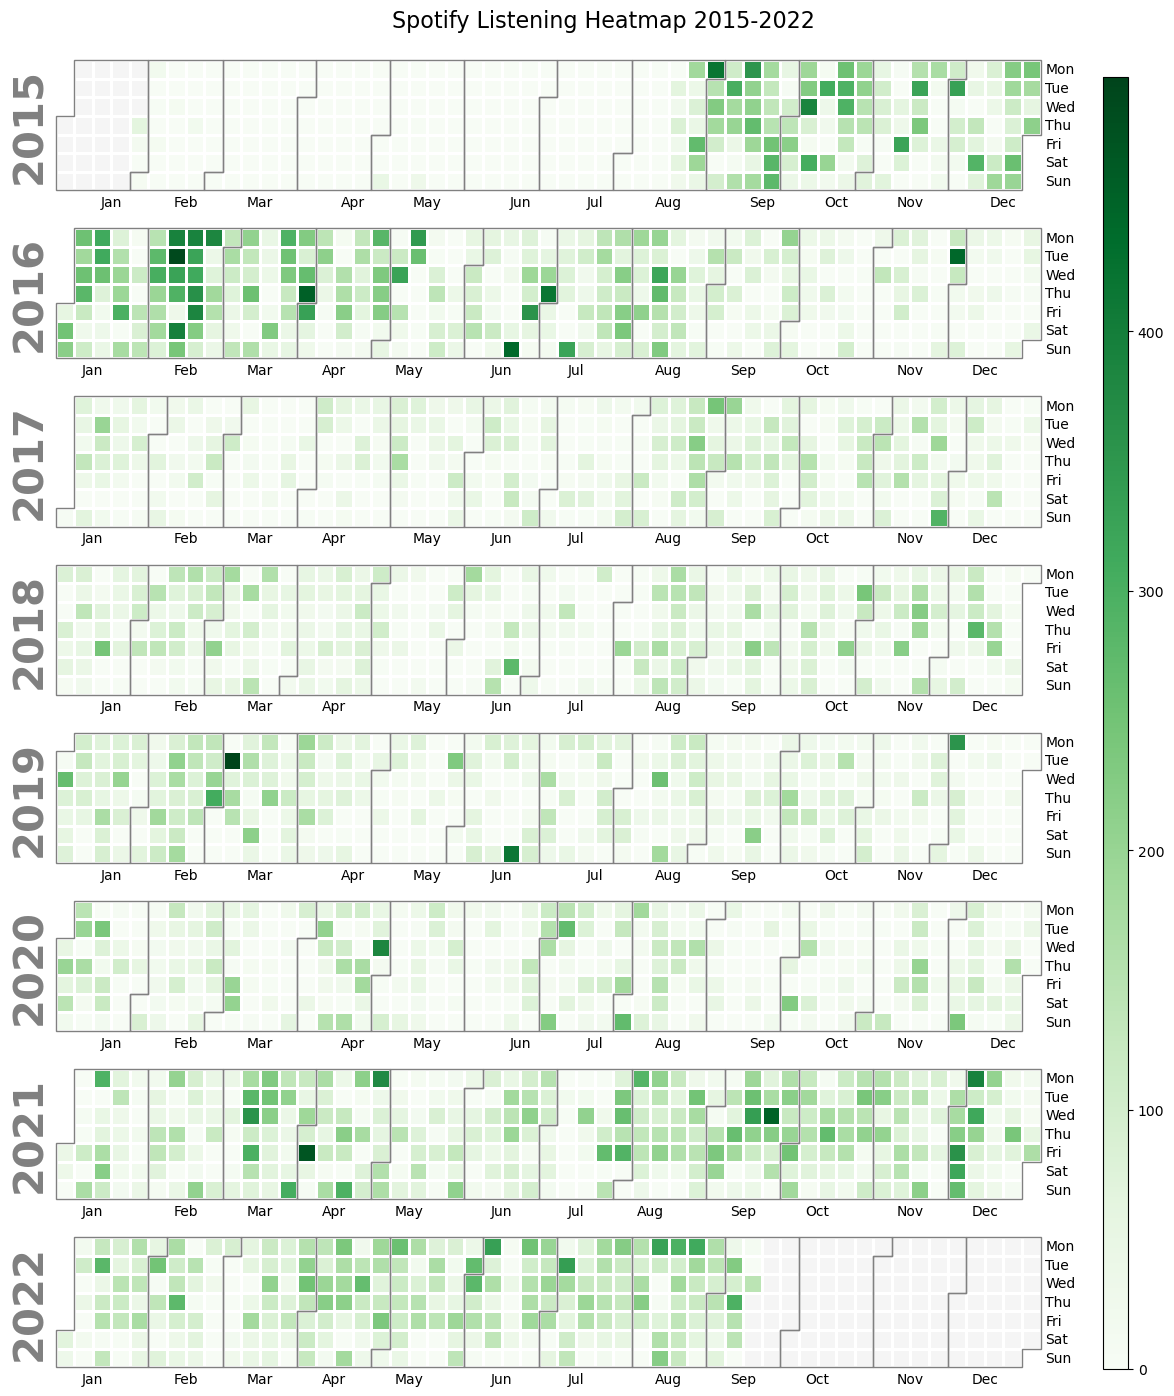

In [142]:
calplot.calplot(data=df['ts'].value_counts(), cmap='Greens')
plt.suptitle('Spotify Listening Heatmap 2015-2022', y=1.025, x=0.45, fontsize=16)
plt.show()

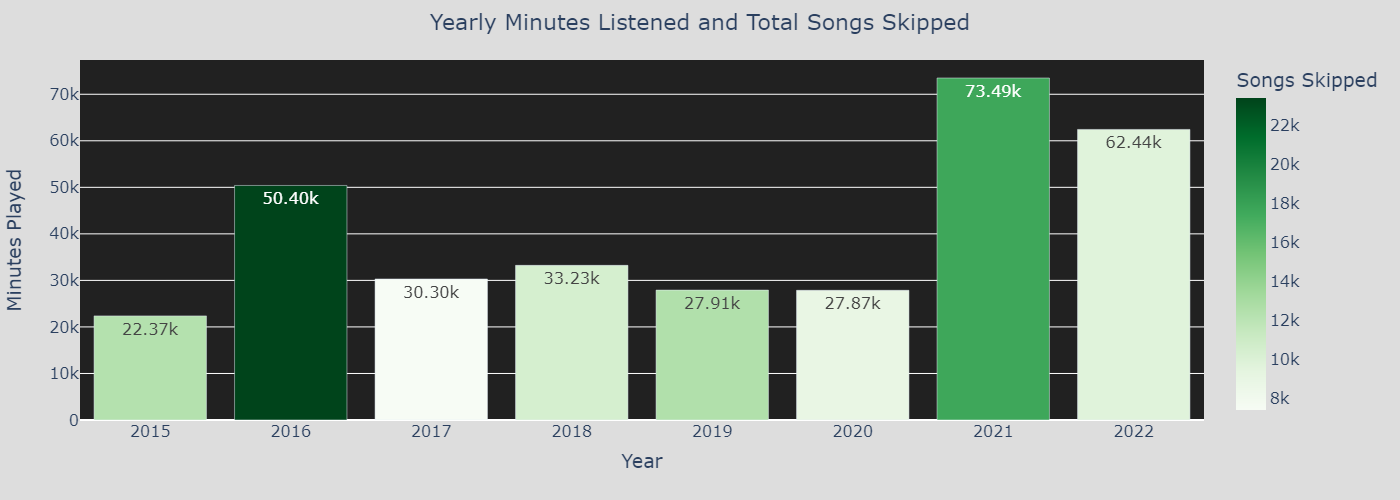

In [143]:
pio.renderers['png'].height, pio.renderers['png'].width = 500, 1400
yearly_agg = df.groupby(df['ts'].dt.year).agg({'minutes_played': 'sum', 'skipped': 'sum'}).reset_index()
fig = px.bar(
    yearly_agg,
    x='ts',
    y='minutes_played',
    color='skipped',
    text='minutes_played',
    labels={'ts':'Year', 'minutes_played':'Minutes Played', 'skipped': 'Songs Skipped'},
    color_continuous_scale=px.colors.sequential.Greens)
fig.update_traces(texttemplate='%{text:.4s}')
fig.update_layout(title_text='Yearly Minutes Listened and Total Songs Skipped', 
                  title_x=0.5, 
                  font_size=16, 
                  plot_bgcolor='#212121',
                  paper_bgcolor='#dddddd')
fig.show()

It appears that when I first started my account, I was hesitant to use it. 

Beginning in late August of 2015, my listening volume became more consistent, and 2016 would go on to be the year with the most volume for the next four years. However, 2016 is also the year with the highest number of songs. Even 2021 had fewer songs skipped! This seems to indicate that toward the beginning of my account, I was exploring more artists and finding what music I don't like, and as time went on, I was more likely to play songs that I'd listen to all the way through. 

It makes sense that I have more time to listen these days.

From 2017 through 2020, I balanced a wider variety of responsibilities as a student. I think my assumption going in was that my listening volume would begin to spike in 2020 because of COVID-19, but out of the years where I have data for each day, it's actually the lowest. 

The result isn't too surprising though. I attended far more meetings and classes in college compared to working full-time. I would wager that if the chart was measuring minutes spent on Zoom, the bars for 2020 and 2021 would be flipped. 

When looking at 2021 in isolation, it's clear that my listening volume spikes in March and April, leading up to my graduation. It then spikes in July, when I start to settle into Chicago. It's interesting to see how my patterns in listening are impacted by life events. 


### Listening by day of week & time of day

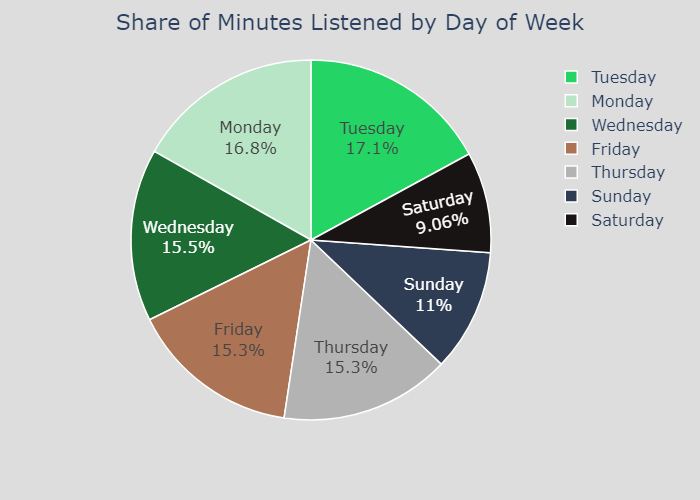

In [144]:
pio.renderers['png'].height, pio.renderers['png'].width = 500, 700
#listening days of the week. 
dow = df.groupby(df['ts'].dt.dayofweek).agg({'minutes_played': 'sum'})
fig = px.pie(dow, 
            values='minutes_played', 
            names=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
            width=700, 
            height=500,
            color_discrete_sequence=['#24d464', '#b7e5c6', '#1c6c34', '#ac7454', '#b3b3b3', '#2e3c54', '#191414'])

fig.update_layout(title_text='Share of Minutes Listened by Day of Week', title_x=0.5, font_size=16, paper_bgcolor='#dddddd')

fig.update_traces(hoverinfo='label+percent', textfont_size=16,
                  textinfo='label+percent',
                  marker=dict(line=dict(color='#FFFFFF', width=1.5)))
fig.show()

I had a hunch that weekends would be the lowest share, I'm more likely to be out and about. I didn't know what to expect about the top weekdays. 

This indicates that I have more focus-time at the beginning of the week. Subtracting the weekend, it's mostly an even distribution, the difference between Tuesday and Thursday is only 1.8%. There's a difference of 5884 minutes between the two days, but that's spread out over seven years.

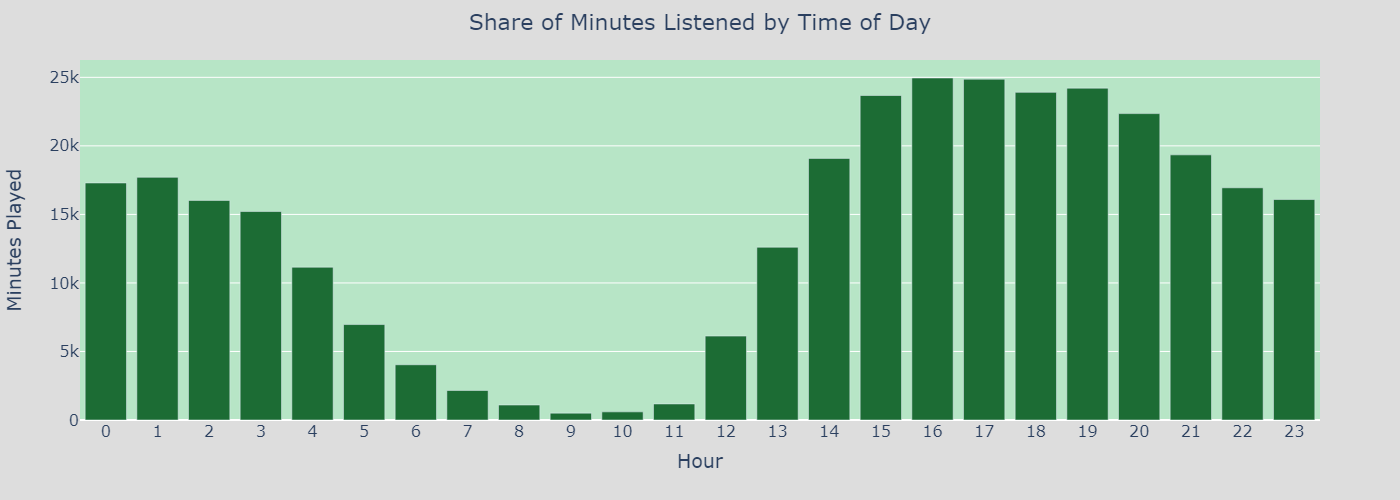

In [145]:
pio.renderers['png'].height, pio.renderers['png'].width = 500, 1400
#time of day
top_hours = df.groupby(df['hour']).agg({'minutes_played': 'sum'})

fig = px.bar(top_hours, 
            labels={'hour': 'Hour', 'value': 'Minutes Played'},
            color_discrete_sequence=['#1c6c34'])
fig.update_layout(title_text='Share of Minutes Listened by Time of Day', 
                title_x=0.5,
                font_size=16,
                xaxis = dict(tickmode = 'linear', tick0 = 0, dtick = 1),
                showlegend=False,
                plot_bgcolor='#b7e5c6',
                paper_bgcolor='#dddddd'
)
fig.show()

I expected midnight - 3 a.m. to be a bit lower. I don't believe that I'm *that* much of a night owl like this chart suggests, but the numbers don't lie. There's bound to be examples of forgetting to turn Spotify off, but there's also plenty of late nights scattered throughout the years. 

The 6 a.m. to 11 a.m. range is exceptionally low, but not surprising. I've used Spotify a lot, but it hasn't found its way into my morning routine. 

Let's see what this chart looks like for 2022. 

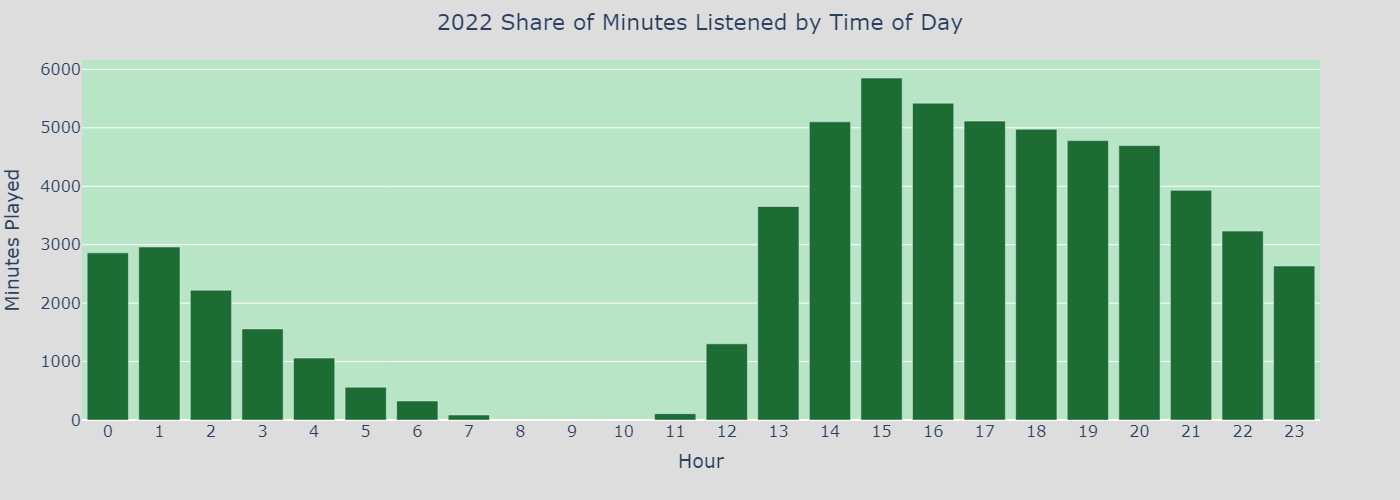

In [146]:
pio.renderers['png'].height, pio.renderers['png'].width = 500, 1400
top_hours_2022 = df.loc[df['ts'].dt.year == 2022].groupby(df['hour']).agg({'minutes_played': 'sum'})

fig = px.bar(top_hours_2022, 
            labels={'hour': 'Hour', 'value': 'Minutes Played'},
            color_discrete_sequence=['#1c6c34'])
fig.update_layout(title_text='2022 Share of Minutes Listened by Time of Day', 
                title_x=0.5,
                font_size=16,
                xaxis = dict(tickmode = 'linear', tick0 = 0, dtick = 1),
                showlegend=False,
                plot_bgcolor='#b7e5c6',
                paper_bgcolor='#dddddd'
)
fig.show()

When comparing 2022 listening to all-time aggregate listening, the dip in volume at night starts a couple hours earlier from 1 a.m to 2 a.m., with a greater share of listening in the afternoon/evening.

### Proportion of songs skipped and the proportion in incognito mode

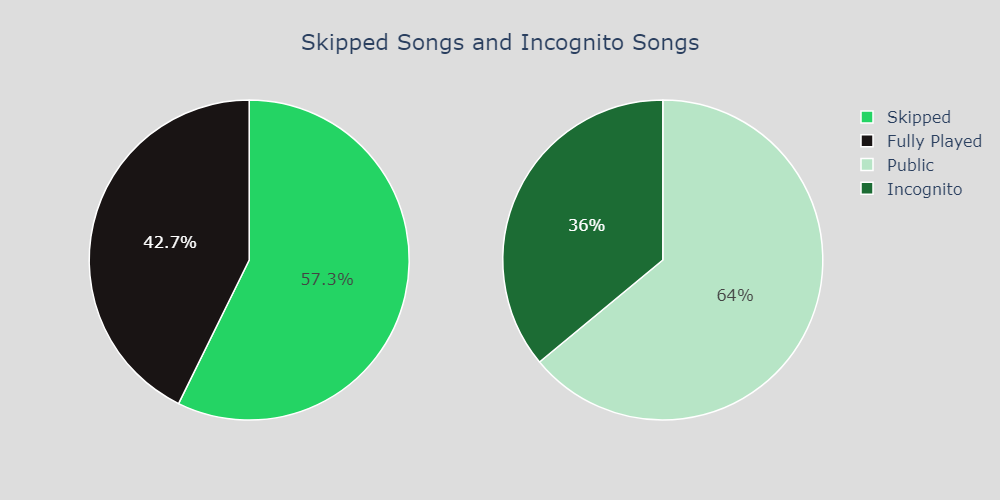

In [147]:
pio.renderers['png'].height, pio.renderers['png'].width = 500, 1000
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])
fig.add_trace(
    go.Pie(
        values=df['skipped'].value_counts(), 
        labels=['Skipped', 'Fully Played'],
        domain=dict(x=[0, 0.5]),
        name='Skipped Or Not',
        marker=dict(colors=['#24d464', '#191414'])),
        row=1, col=1
)

fig.add_trace(
    go.Pie(
        values=df['incognito_mode'].value_counts(), 
        labels=['Public', 'Incognito'], #in order of False, True because False has a higher value count
        domain=dict(x=[0.5, 1]),
        name='Listening Mode',
        marker=dict(colors=['#b7e5c6', '#1c6c34'])), 
        row=1, col=2
)

fig.update_layout(height=500, width=1000, title_x=0.5,
                font_size=16, title_text='Skipped Songs and Incognito Songs', paper_bgcolor='#dddddd')
fig.update_traces(marker=dict(line=dict(color='#FFFFFF', width=1.5)))

fig.show()

I've skipped about 25,000 more songs than I have completed. A greater share of my songs played were skipped in search of the 'perfect track' for that moment. 

I expected this chart to be more 50/50, though the results make sense because I often don't skip just one song, but many songs in succession. 

I'm not sure what to make of the songs in incognito mode. I know that I use the feature haphazardly, so I thought it would be lower, not 1/3 of all tracks played.

### Why songs start and end

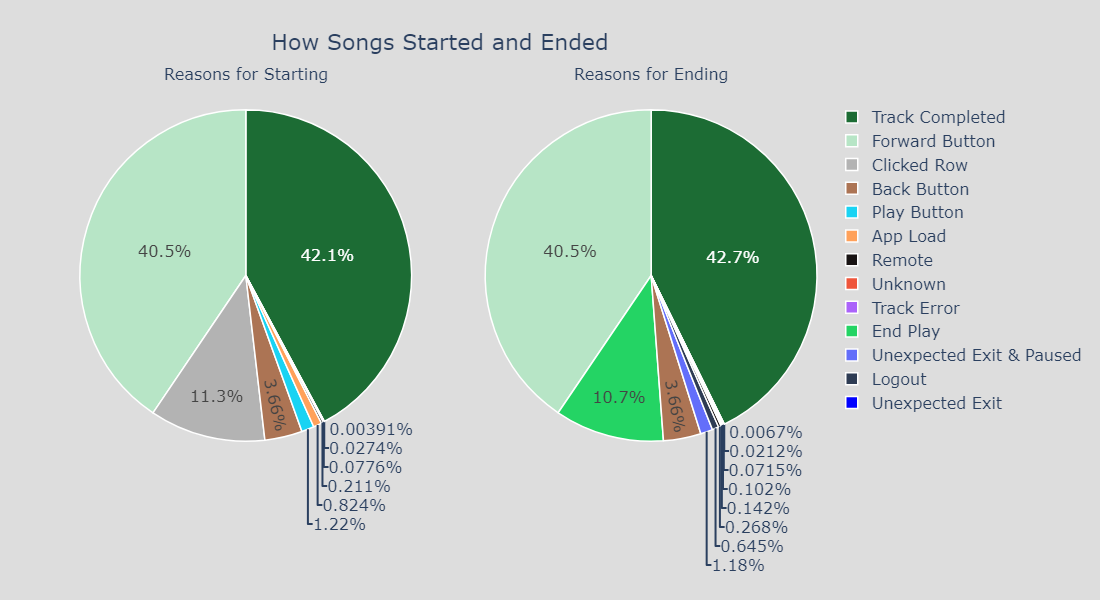

In [148]:
pio.renderers['png'].height, pio.renderers['png'].width = 600, 1100

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]],
                    subplot_titles=("Reasons for Starting", "Reasons for Ending"))
fig.add_trace(
    go.Pie(
        values=df['reason_start'].value_counts(), 
        labels=['Track Completed', 'Forward Button', 'Clicked Row', 'Back Button', 'Play Button', 
                'App Load', 'Remote', 'Unknown', 'Track Error', 'End Play'],
        domain=dict(x=[0, 0.5]),
        name='Start Reason',
        marker=dict(colors=['#1c6c34', '#b7e5c6', '#b3b3b3', '#ac7454', '#19D3F3', '#FFA15A', '#191414', '#EF553B', '#AB63FA', '#24d464'])),
        row=1, col=1
)

fig.add_trace(
    go.Pie(
        values=df['reason_end'].value_counts(), 
        labels=['Track Completed', 'Forward Button', 'End Play', 'Back Button', 'Unexpected Exit & Paused', 
                'Logout', 'Remote', 'Unexpected Exit', 'Unknown', 'Clicked Row', 'Track Error', 'App Load'],
        domain=dict(x=[0.5, 1]),
        name='End Reason',
        marker=dict(colors=['#1c6c34', '#b7e5c6', '#24d464', '#ac7454', '#636EFA', '#2e3c54', '#191414', 'blue', '#EF553B', '#b3b3b3', '#AB63FA', '#FFA15A'])), 
        row=1, col=2
)

fig.update_layout(height=600, width=1100, title_x=0.40,
                font_size=16, title_text='How Songs Started and Ended', paper_bgcolor='#dddddd')
fig.update_annotations(yshift=15)
fig.update_traces(marker=dict(line=dict(color='#FFFFFF', width=1.5)))
fig.show()

I like these charts, particularly the one for `reason_end` because it provides more detail about the `skipped` column. The values for End Play in `reason_end` seem to correlate with values for Click Row in `reason_start`, which is to select a new song from the queue. I figured that those values would be similar in both charts, but they appear to be inverted. You can't really see End Play in `reason_start` or Click Row in `reason_end` because they both represent less than 1% in the respective charts.

This also explains my hunch that tracks completed vs. skipped would be closer to 50/50. These charts show that I'm completing songs about as often as I am hitting the forward button. 

### Average share of songs completed vs. skipped 

In [149]:
df['percent_listened'] = round(df['ms_played'] / df['duration_ms'], 2)
df['percent_listened'].mean()

0.49426885527900843

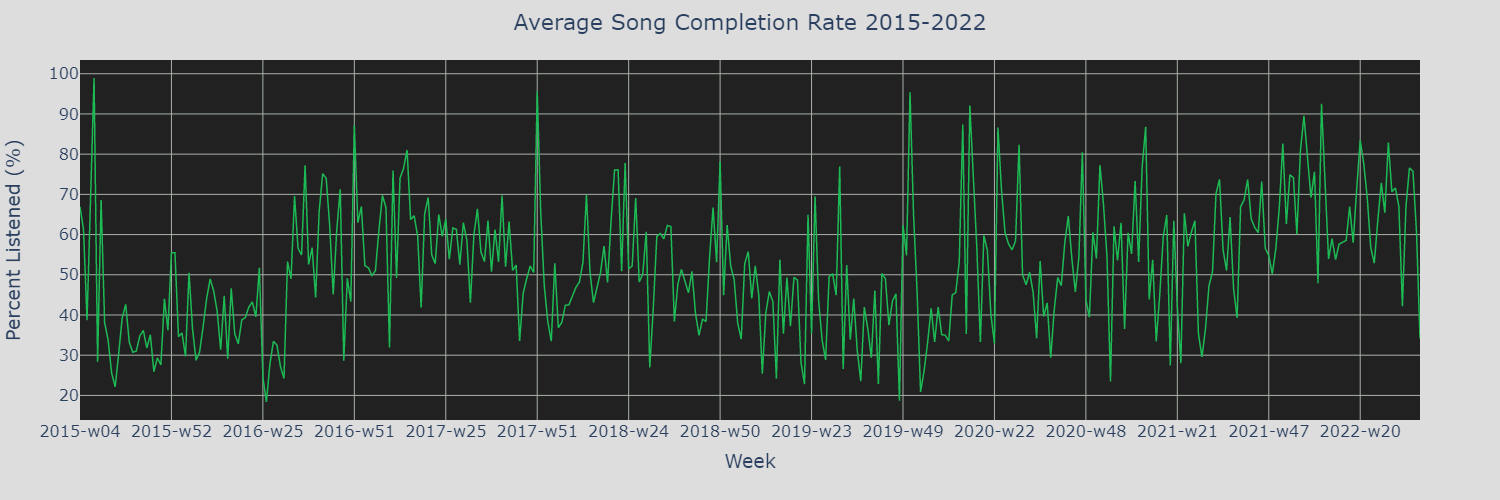

In [150]:
pio.renderers['png'].height, pio.renderers['png'].width = 500, 1500
avg_listen_rate = df.groupby(df['ts'].dt.strftime('%Y-w%U')).agg({'percent_listened': 'mean'}).reset_index()
avg_listen_rate.loc[:, 'percent_listened'] = round(avg_listen_rate['percent_listened']*100, 2)

fig = px.line(
    avg_listen_rate, 
    x='ts', 
    y='percent_listened',
    labels={'ts':'Week', 'percent_listened':'Percent Listened (%)'})
fig.update_traces(line=dict(color='#1DB954', width=1.5))
fig.update_layout(title_text='Average Song Completion Rate 2015-2022', 
                title_x=0.5, 
                font_size=16, 
                plot_bgcolor='#212121',
                paper_bgcolor='#dddddd',
                xaxis = dict(tickmode = 'linear', tick0 = '2015-w00', dtick = 26))
                
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='#a8b2a8')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='#a8b2a8')
fig.show()


This chart definitely correlates with the increase in daily listening minutes starting in 2021, showing a consistent trend in a greater share of completed tracks. This makes sense because I'm letting the app run in the background more often, leading to more song completions, and more minutes listened overall.

At the tail end of the chart, the two weeks with an average completion rate of sub-40% are more than two years apart! 

While 2021 was a higher volume year, 2020 had five weeks with an average listening percentage above 80%, which is the most out of the years pictured. The year as whole, however, is wildly inconsistent compared to previous years with a more gradual decrease over time. 

### Top artists

In [151]:
full_listen = df.loc[df['reason_end'] == 'trackdone', :]
print("I've fully listened to", len(full_listen), "songs all the way through")

I've fully listened to 76491 songs all the way through


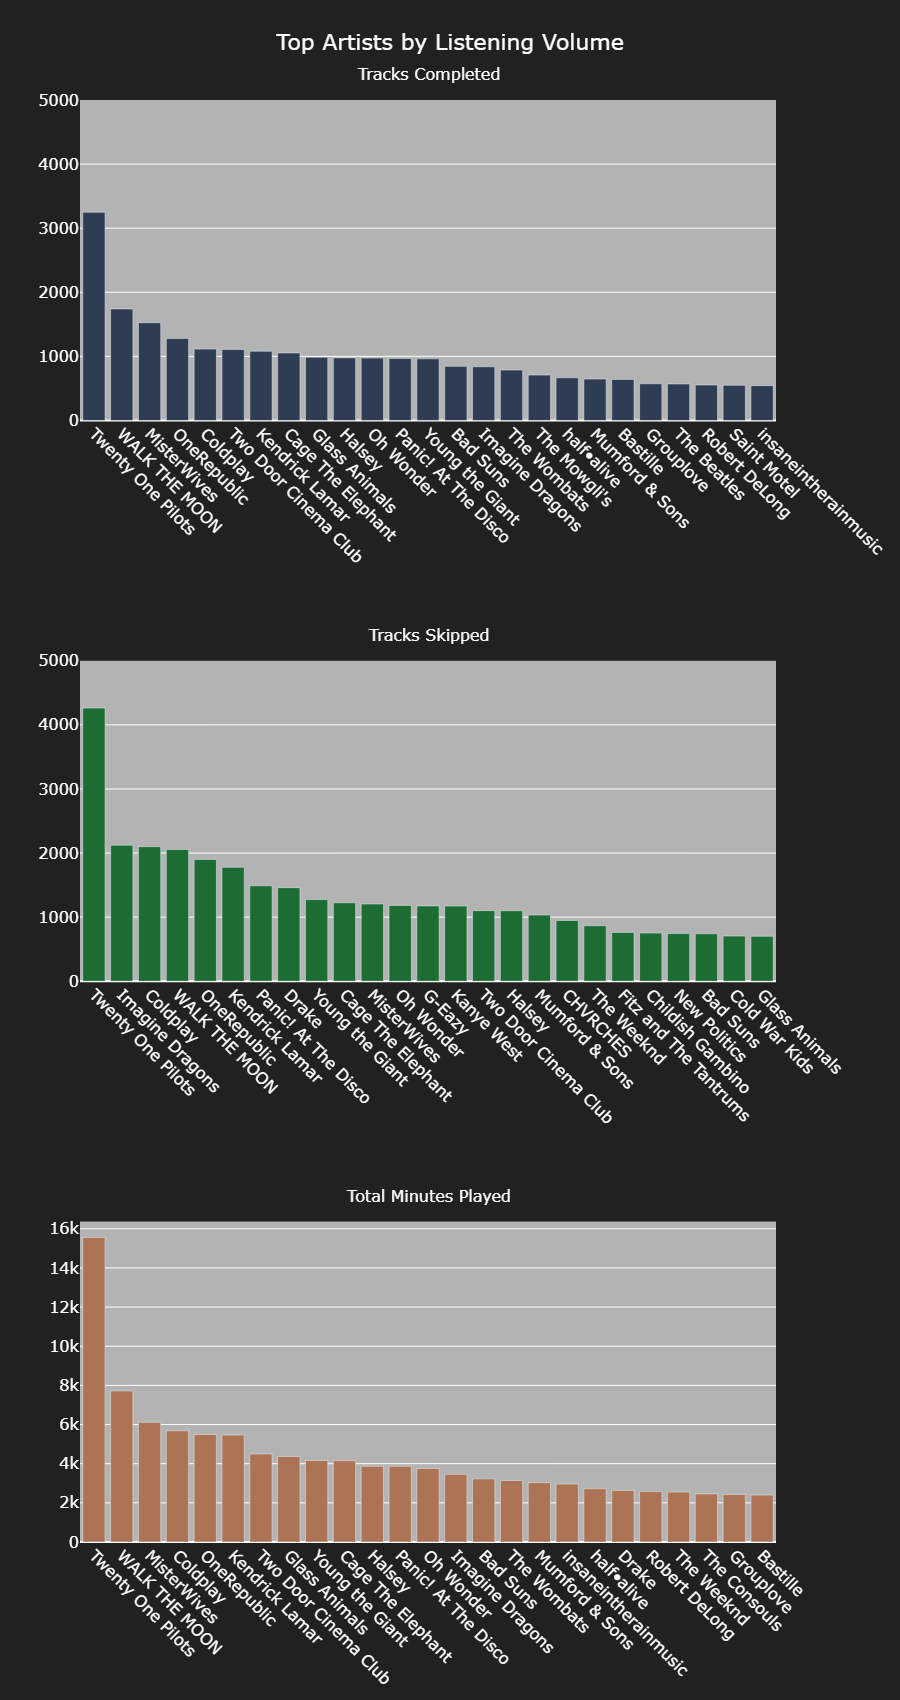

In [152]:
pio.renderers['png'].height, pio.renderers['png'].width = 1700, 900
#setting up artist data
top_full_listens = (
    full_listen.groupby('master_metadata_album_artist_name')['master_metadata_track_name']
    .count().sort_values(ascending=False).reset_index().head(25)
)
skipped_songs = df.loc[df['skipped'] == True, :]
top_skipped = (
    skipped_songs.groupby('master_metadata_album_artist_name')['master_metadata_track_name']
    .count().sort_values(ascending=False).reset_index().head(25)
)
top_mins_played = (
    df.groupby('master_metadata_album_artist_name')['minutes_played']
    .sum().sort_values(ascending=False).reset_index().head(25)
)

#plot begins here
fig = make_subplots(rows=3, cols=1,
                   subplot_titles=("Tracks Completed", "Tracks Skipped", "Total Minutes Played"))

fig.add_trace(
    go.Bar(x=top_full_listens['master_metadata_album_artist_name'],
           y=top_full_listens['master_metadata_track_name'],
           name='Tracks Completed',
           marker_color='#2e3c54'),
    row=1, col=1)

fig.add_trace(
    go.Bar(x=top_skipped['master_metadata_album_artist_name'],
           y=top_skipped['master_metadata_track_name'],
           name='Tracks Skipped',
           marker_color='#1c6c34'),
    row=2, col=1)

fig.add_trace(
    go.Bar(x=top_mins_played['master_metadata_album_artist_name'],
           y=top_mins_played['minutes_played'],
           name='Total Minutes',
           marker_color='#ac7454'),
    row=3, col=1)

fig.update_layout(height=1700, 
                  width=900, 
                  title_x=0.5,
                  font_size=16, 
                  showlegend=False, 
                  title_text='Top Artists by Listening Volume',
                  paper_bgcolor='#212121',
                  plot_bgcolor='#b3b3b3',
                  font_color="white")
fig.update_xaxes(tickangle=45)
fig.update_yaxes(range=[0,5000], row=1, col=1)
fig.update_yaxes(range=[0,5000], row=2, col=1)
fig.update_annotations(yshift=15)
fig.show()

In aggregate, Twenty One Pilots is a clear favorite, but they also have the most skipped songs by a wider margin. 

Most artists have more skipped songs than full-listens. Glass Animals is a notable exception, with 284 more play-throughs than skips. Two Door Cinema Club is about 50/50. There are also a handful of artists that are in one chart but not the other. 

What these charts won't get at is the listening volume over time. My interest in these artists has defintiely changed throughout the years. 

In [153]:
#Get the daily listening in minutes played from the top artists by completed tracks

top_10_artists = list(top_full_listens['master_metadata_album_artist_name'].head(10))

top_artist_df = df.loc[df['master_metadata_album_artist_name'].isin(top_10_artists), :]

artist_mins_time = top_artist_df.groupby(['master_metadata_album_artist_name', 'day'])['minutes_played'].sum().reset_index()
#makes up this much of the total
print('The top 10 artists make up', str(round((top_artist_df['minutes_played'].sum()/df['minutes_played'].sum())*100, 2)) + '% or', 
      round(top_artist_df['minutes_played'].sum(),2), 'of', round(df['minutes_played'].sum(),2), 'total listening minutes')

The top 10 artists make up 19.17% or 62893.64 of 328028.89 total listening minutes


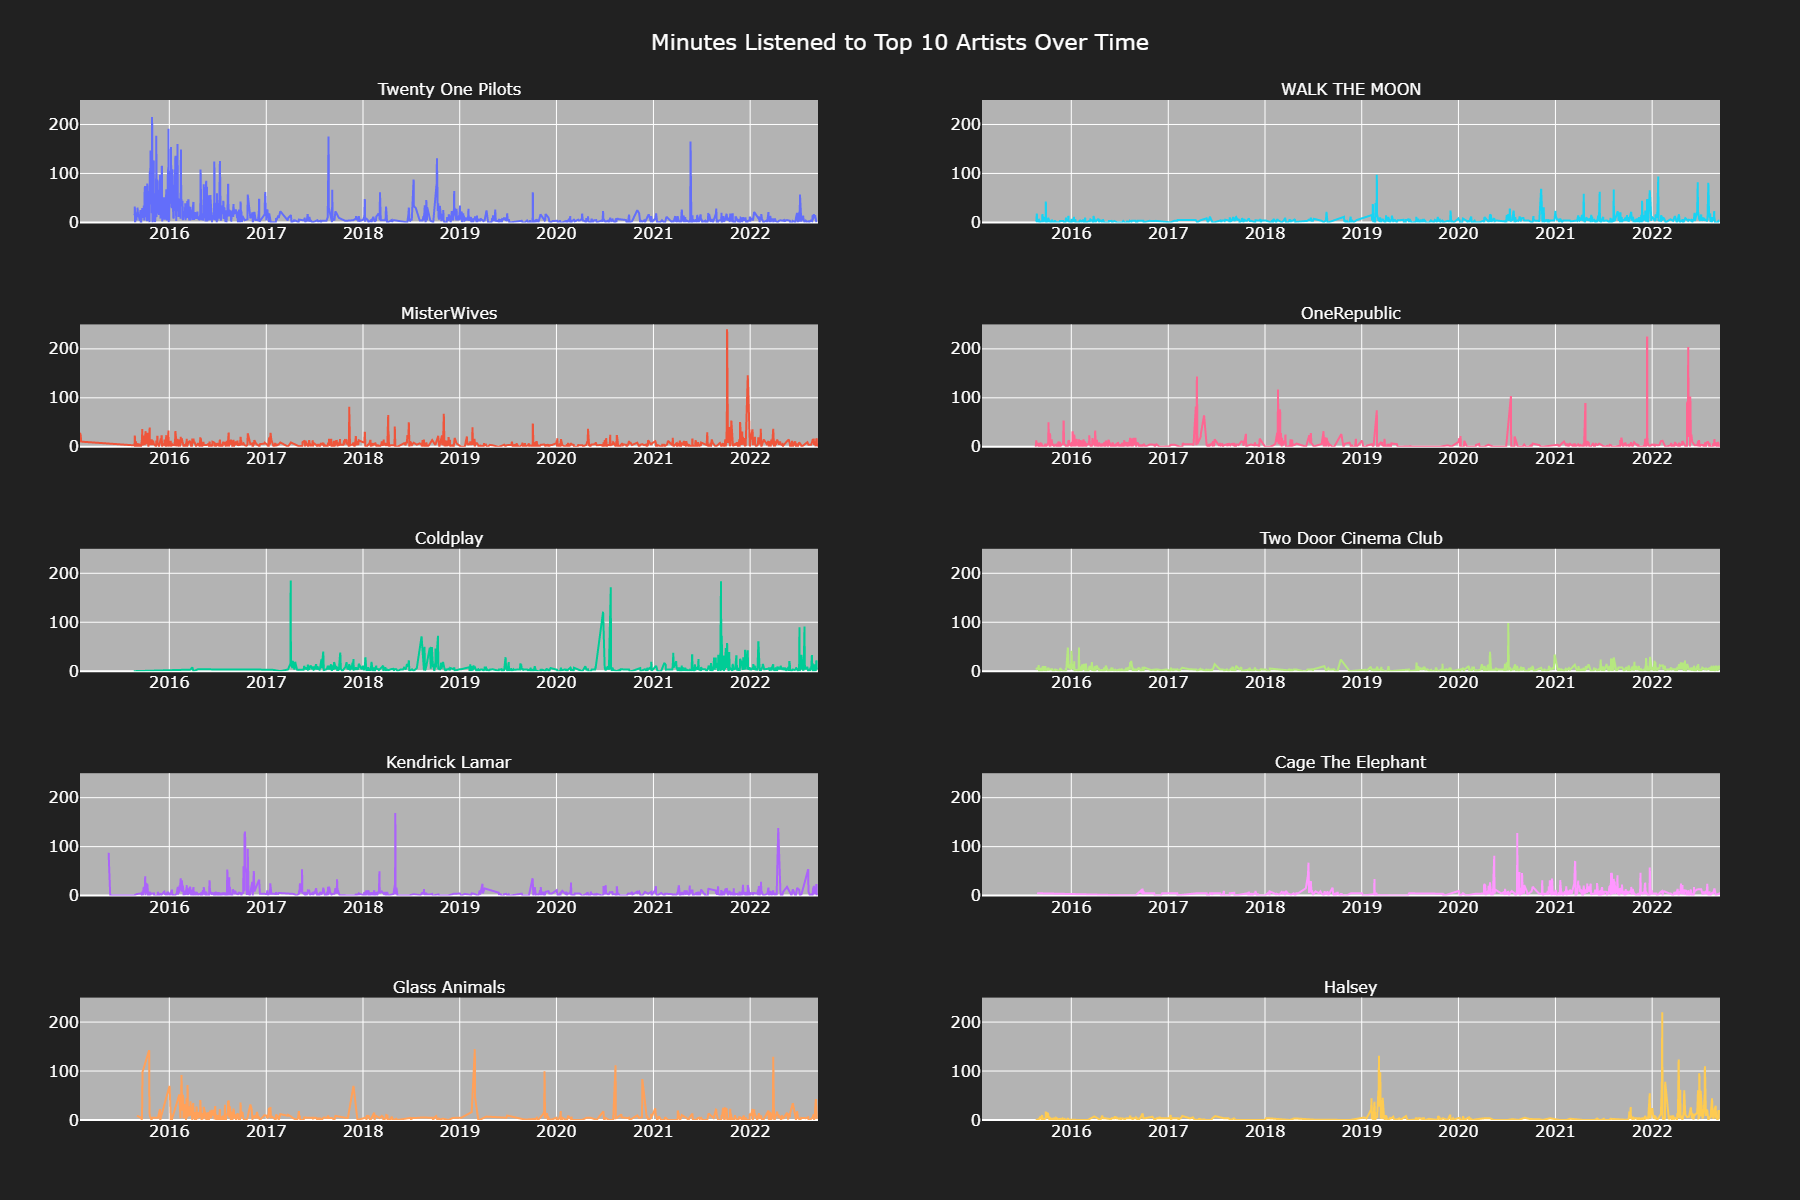

In [154]:
pio.renderers['png'].height, pio.renderers['png'].width = 1200, 1800

fig = make_subplots(rows=5, cols=2, subplot_titles=top_10_artists)


for i, artist in enumerate(top_10_artists):
    df_toplot = artist_mins_time[artist_mins_time['master_metadata_album_artist_name'] == artist]
    fig.update_yaxes(range=[0,250])
    fig.update_xaxes(range=[pd.to_datetime('1-29-2015'), pd.to_datetime('9-14-2022')])
    if i<5:
        fig.add_trace(
            go.Scatter(
                x=df_toplot['day'], 
                y=df_toplot['minutes_played']),
        row=i+1,
        col=1
        )
    else:
        fig.add_trace(
            go.Scatter(
                x=df_toplot['day'], 
                y=df_toplot['minutes_played']),
        row=(i+1)-5,
        col=2
        )
    
fig.update_layout(height=1200, 
                  width=1800, 
                  title_x=0.5,
                  font_size=16, 
                  showlegend=False, 
                  title_text='Minutes Listened to Top 10 Artists Over Time',
                  paper_bgcolor='#212121',
                  plot_bgcolor='#b3b3b3',
                  font_color="white")
fig.show()    

As I expected, the bulk my listeneing to Twenty One Pilots is in the earlier years. Misterwives, along with most other artists in the top 10, have more listening minutes across 2022 comparatively. 

I probably could have guessed a good chunk of the artists that appear in the top ten, but I don't think I would've been able to guess the order of artists. My gut sense was that Coldplay would be lower than 5th, and Glass Animals would be higher than 9th. 

### Top tracks

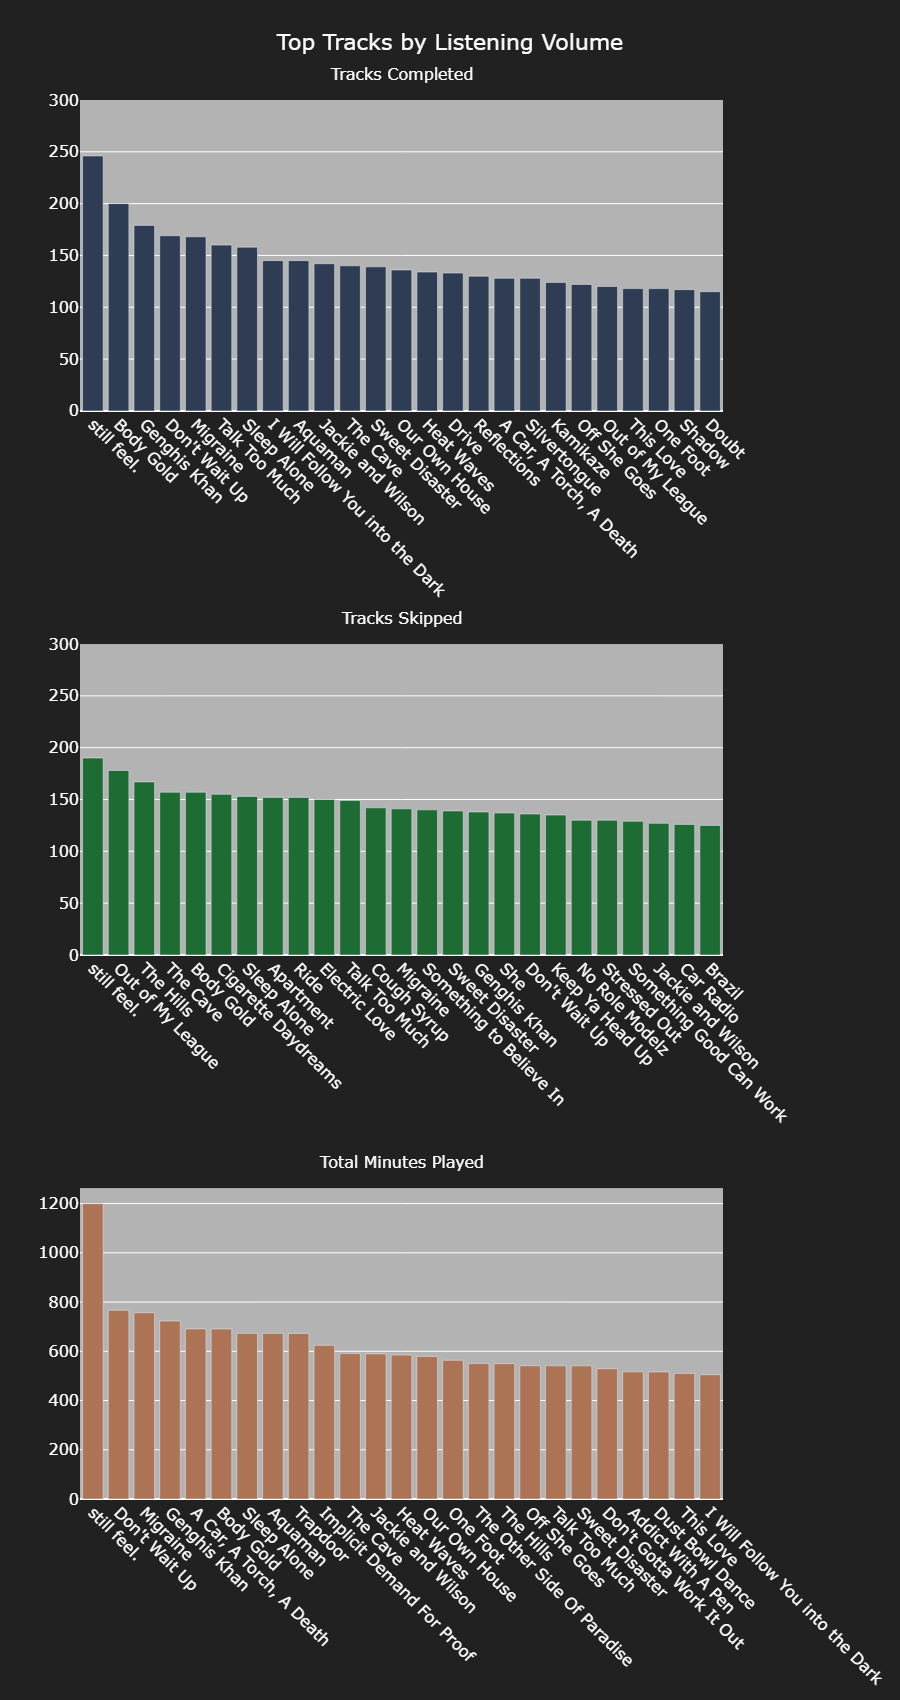

In [155]:
pio.renderers['png'].height, pio.renderers['png'].width = 1700, 900
#setting up track data
tracks_full_listens = (
    full_listen.groupby(['master_metadata_album_artist_name', 'master_metadata_track_name'])
    .size().sort_values(ascending=False).reset_index().rename(columns={0:'num_plays'}).head(25)
)

tracks_skipped = (
    skipped_songs.groupby(['master_metadata_album_artist_name', 'master_metadata_track_name'])
    .size().sort_values(ascending=False).reset_index().rename(columns={0:'num_skips'}).head(25)
)

tracks_mins_played = (
    df.groupby(['master_metadata_album_artist_name', 'master_metadata_track_name'])['minutes_played'].sum().sort_values(ascending=False).reset_index().head(25)
)


#plot begins here
fig = make_subplots(rows=3, cols=1,
                   subplot_titles=("Tracks Completed", "Tracks Skipped", "Total Minutes Played"))

fig.add_trace(
    go.Bar(x=tracks_full_listens['master_metadata_track_name'],
           y=tracks_full_listens['num_plays'],
           name='Tracks Completed',
           marker_color='#2e3c54'),
    row=1, col=1)

fig.add_trace(
    go.Bar(x=tracks_skipped['master_metadata_track_name'],
           y=tracks_skipped['num_skips'],
           name='Tracks Skipped',
           marker_color='#1c6c34'),
    row=2, col=1)

fig.add_trace(
    go.Bar(x=tracks_mins_played['master_metadata_track_name'],
           y=tracks_mins_played['minutes_played'],
           name='Total Minutes',
           marker_color='#ac7454'),
    row=3, col=1)

fig.update_layout(height=1700, 
                  width=900, 
                  title_x=0.5,
                  font_size=16, 
                  showlegend=False, 
                  title_text='Top Tracks by Listening Volume',
                  paper_bgcolor='#212121',
                  plot_bgcolor='#b3b3b3',
                  font_color="white")
fig.update_xaxes(tickangle=45)
fig.update_yaxes(range=[0,300], row=1, col=1)
fig.update_yaxes(range=[0,300], row=2, col=1)
fig.update_annotations(yshift=15)
fig.show()

In contrast with top artists, most top tracks are completed more often than they are skipped, more often closer to a 50/50 split. 

I continue to be a big fan of still feel. by half•alive, but I want to see volume for top songs over time anyways. 

In [156]:
#Get the daily listening in minutes played from the top artists by completed tracks

top_10_tracks = list(tracks_full_listens['master_metadata_track_name'].head(10))

top_tracks_df = df.loc[df['master_metadata_track_name'].isin(top_10_tracks), :]

tracks_mins_time = top_tracks_df.groupby(['master_metadata_track_name', 'day'])['minutes_played'].sum().reset_index()
#makes up this much of the total
print('The top 10 tracks make up', str(round((top_tracks_df['minutes_played'].sum()/df['minutes_played'].sum())*100, 2)) + '% or', 
      round(top_tracks_df['minutes_played'].sum(),2), 'of', round(df['minutes_played'].sum(),2), 'total listening minutes')

The top 10 tracks make up 2.17% or 7116.87 of 328028.89 total listening minutes


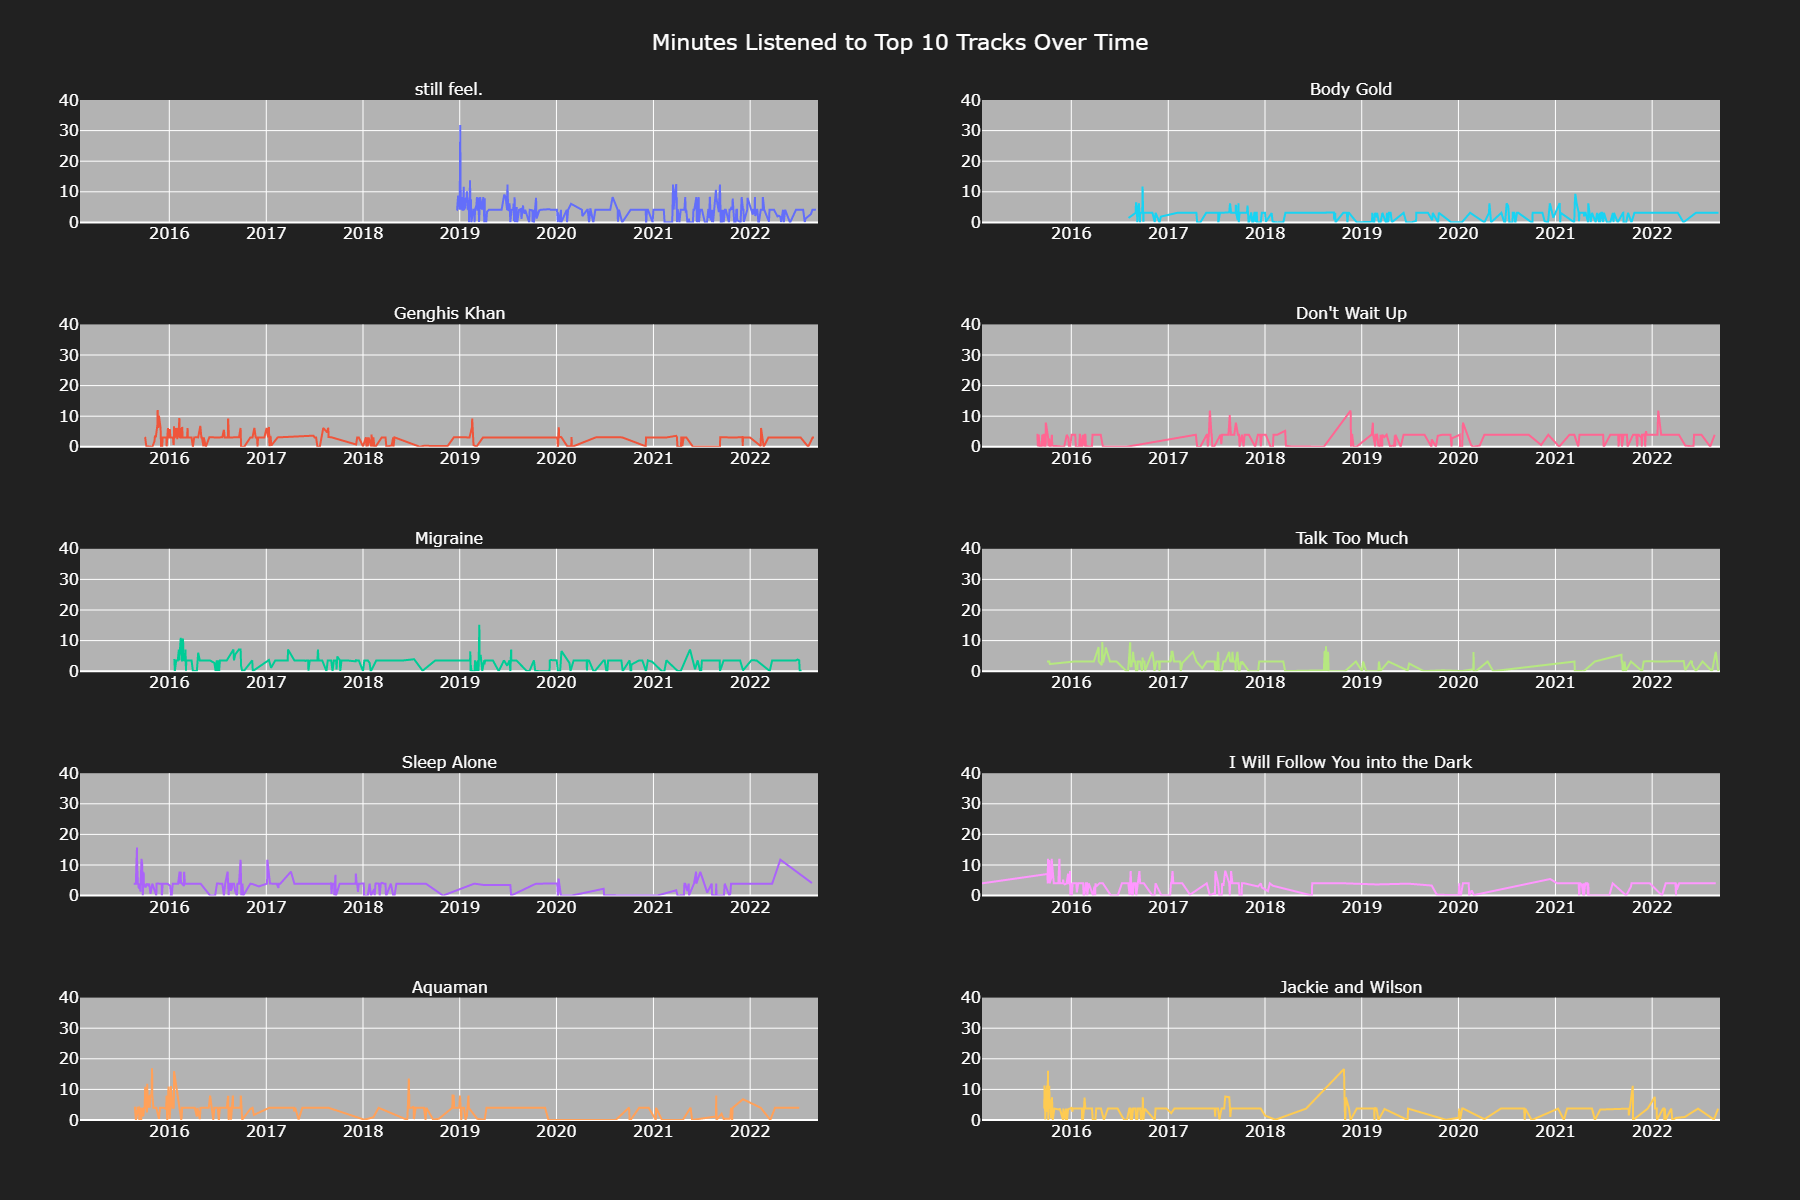

In [157]:
pio.renderers['png'].height, pio.renderers['png'].width = 1200, 1800
fig = make_subplots(rows=5, cols=2, subplot_titles=top_10_tracks)


for i, track in enumerate(top_10_tracks):
    df_toplot = tracks_mins_time[tracks_mins_time['master_metadata_track_name'] == track]
    fig.update_yaxes(range=[0,40])
    fig.update_xaxes(range=[pd.to_datetime('1-29-2015'), pd.to_datetime('9-14-2022')])
    if i<5:
        fig.add_trace(
            go.Scatter(
                x=df_toplot['day'], 
                y=df_toplot['minutes_played']),
        row=i+1,
        col=1
        )
    else:
        fig.add_trace(
            go.Scatter(
                x=df_toplot['day'], 
                y=df_toplot['minutes_played']),
        row=(i+1)-5,
        col=2
        )
    
fig.update_layout(height=1200, 
                  width=1800, 
                  title_x=0.5,
                  font_size=16, 
                  showlegend=False, 
                  title_text='Minutes Listened to Top 10 Tracks Over Time',
                  paper_bgcolor='#212121',
                  plot_bgcolor='#b3b3b3',
                  font_color="white")
fig.show()    

The top song having the most listening volume in about half of the total time of the account is pretty remarkable. I don't think I would be able to guess many of the songs in the top ten, let alone the order. I would say I like the top 10 just as much as the next 10, which is reflected by how close they are in terms of play-throughs and minutes listened being relatively similar across the board. 

### Top albums

In [158]:
#album counts
top_albums = df.groupby(['master_metadata_album_artist_name', 'master_metadata_album_album_name']).agg(
    minutes_played=('minutes_played', 'sum'), tracks_played=('master_metadata_track_name', pd.Series.nunique), total_tracks=('tracks.total', 'mean')
    ).reset_index()
top_albums.sort_values(by='minutes_played', ascending=False).head(10)

,master_metadata_album_artist_name,master_metadata_album_album_name,minutes_played,tracks_played,total_tracks
10261,Twenty One Pilots,Twenty One Pilots,5656.394483,14,14.0
10247,Twenty One Pilots,Blurryface,4355.150300,14,14.0
10262,Twenty One Pilots,Vessel,3435.842783,22,12.0
6992,Oh Wonder,Oh Wonder,3000.037533,15,15.0
6537,Mumford & Sons,Sigh No More,2672.249100,13,12.0
10535,WALK THE MOON,TALKING IS HARD,2287.219483,12,12.0
10542,WALK THE MOON,What If Nothing,2145.510967,13,13.0
6371,MisterWives,Our Own House,2026.680333,12,12.0
10540,WALK THE MOON,Walk The Moon,2007.822550,11,11.0
6361,MisterWives,Connect The Dots,2006.805433,11,11.0


In [159]:
album_full_listens = top_albums.loc[top_albums['tracks_played'] >= top_albums['total_tracks']]
print("I've listened to", len(album_full_listens), "albums all the way through.")

I've listened to 3813 albums all the way through.


### Top release years

In [160]:
df['album.release_date'].value_counts().head(10)

2015.0    28073
2016.0    16356
2017.0    14899
2014.0    14671
2013.0    13615
2018.0     9520
2012.0     8201
2020.0     7563
2019.0     7420
2009.0     7201
Name: album.release_date, dtype: int64

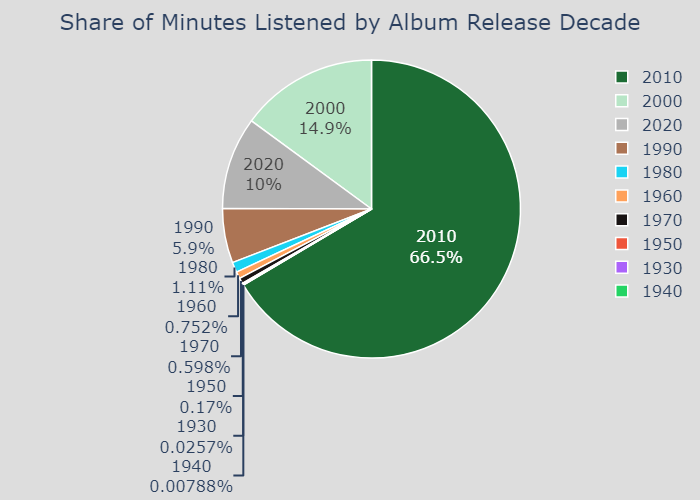

In [161]:
pio.renderers['png'].height, pio.renderers['png'].width = 500, 700
#decade of release date
top_decades = df.groupby((df['album.release_date']//10)*10).agg({'minutes_played': 'sum'}).reset_index()

fig = px.pie(top_decades, 
            values='minutes_played', 
            names=top_decades['album.release_date'],
            width=700, 
            height=500,
            color_discrete_sequence=['#1c6c34', '#b7e5c6', '#b3b3b3', '#ac7454', '#19D3F3', '#FFA15A', '#191414', '#EF553B', '#AB63FA', '#24d464'])

fig.update_layout(title_text='Share of Minutes Listened by Album Release Decade', title_x=0.5, font_size=16, paper_bgcolor='#dddddd')

fig.update_traces(hoverinfo='label+percent', textfont_size=16,
                  textinfo='label+percent',
                  marker=dict(line=dict(color='#FFFFFF', width=1.5)))
fig.show()

I expected more 90s. I figured 2010s would take up the largest share, but not 2/3s of all listening minutes. The 2020s taking up 10% of all minutes despite being less than two years in is also crazy to me. I guess I'm much more into new/contemporary music than I previously thought. 

### Record labels

In [162]:
print("I've heard songs from", df['label'].nunique(), "unique record labels/ record label collaborations.")

I've heard songs from 4069 unique record labels/ record label collaborations.


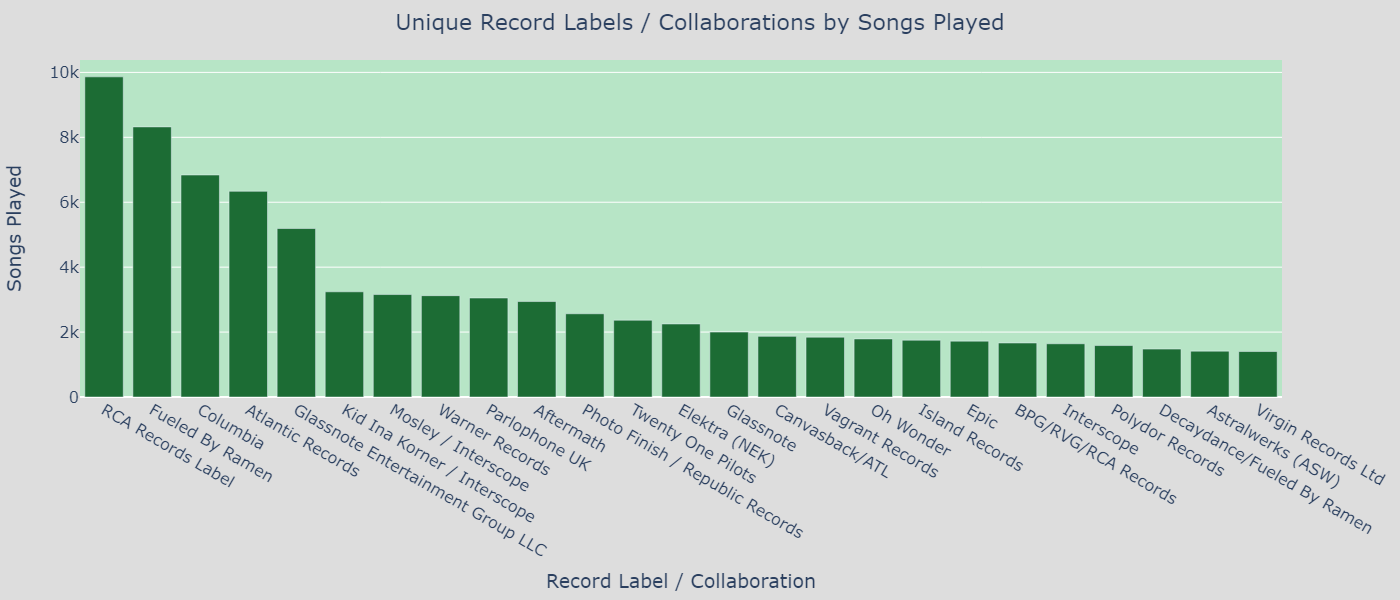

In [163]:
pio.renderers['png'].height, pio.renderers['png'].width = 600, 1400
rl = df['label'].value_counts().head(25).to_frame()

fig = px.bar(rl,
            labels={'index': 'Record Label / Collaboration', 'value': 'Songs Played'},
            color_discrete_sequence=['#1c6c34'])
fig.update_layout(height=600, 
                width=1400,
                title_text='Unique Record Labels / Collaborations by Songs Played', 
                title_x=0.5,
                font_size=16,
                xaxis = dict(tickmode = 'linear', tick0 = 0, dtick = 1),
                showlegend=False,
                plot_bgcolor='#b7e5c6',
                paper_bgcolor='#dddddd'
)
fig.show()

I knew that record labels were big, but I didn't realize the sheer number of artists under the top labels such as [RCA Records](https://en.wikipedia.org/wiki/List_of_RCA_Records_artists) and [Fueled By Ramen](https://en.wikipedia.org/wiki/Category:Fueled_by_Ramen_artists). 

### Track features

In [164]:
#normalizing loudness to be on the same 0-1 scale as other track features

df['loudness'] = (df['loudness'] - df['loudness'].min()) / (df['loudness'].max() - df['loudness'].min())
df['loudness'].describe()

count    179048.000000
mean          0.823124
std           0.062924
min           0.000000
25%           0.798336
50%           0.835646
75%           0.862233
max           1.000000
Name: loudness, dtype: float64

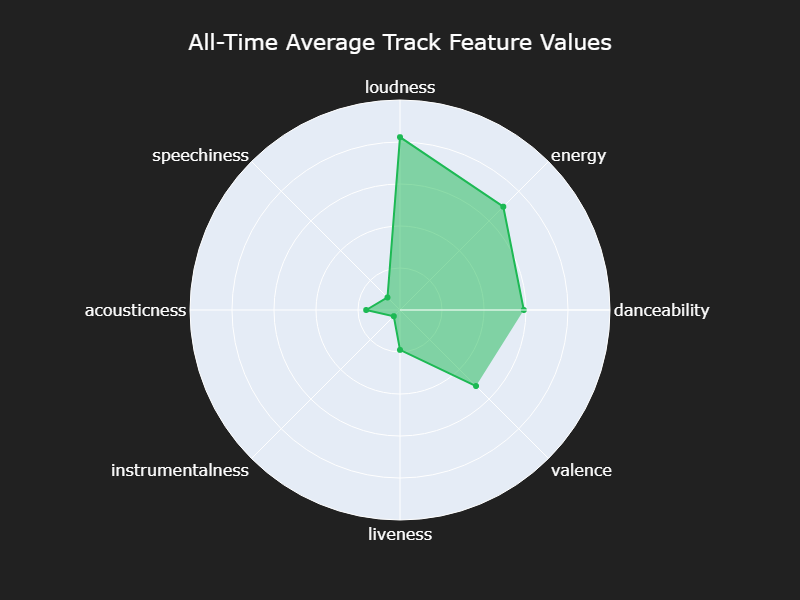

In [165]:
pio.renderers['png'].height, pio.renderers['png'].width = 600, 800
#track features
track_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
feature_avgs = df[track_features].mean()

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=feature_avgs.values, 
    theta=feature_avgs.index,
    line_color='#1DB954'))
fig.update_traces(fill='toself')
fig.update_layout(height=600, 
                width=800,
                paper_bgcolor='#212121',
                font_color="white",
                title_text='All-Time Average Track Feature Values',
                title_x=0.5,
                font_size=16,
                polar = dict(
                    radialaxis = dict(range=[0, 1], showticklabels=False, ticks=''))
)
fig.show()

I figured that energy and loudness would be most prevalent, though I thought I would see more energy than loudness. Overall this isn't too surprising to me, I know I'm less likely to listen to acoustic versions. I'd like to see what this chart looks like for my friends!

### Popularity

In [166]:
artist_stats = df.groupby('master_metadata_album_artist_name').agg(
    {'artist_popularity': 'mean', 'track_popularity': 'mean', 'album_popularity': 'mean', 'minutes_played': 'sum', 'followers.total': 'mean'}
    ).sort_values(by='minutes_played', ascending=False).reset_index()

In [167]:
artist_stats.head()

,master_metadata_album_artist_name,artist_popularity,track_popularity,album_popularity,minutes_played,followers.total
0,Twenty One Pilots,79.0,61.443808,69.897736,15549.553233,22822913.0
1,WALK THE MOON,67.0,41.345718,56.582609,7715.067467,1986969.0
2,MisterWives,59.0,40.190546,46.521070,6111.317250,422139.0
3,Coldplay,88.0,64.271793,75.663138,5680.731450,39989440.0
4,OneRepublic,84.0,49.382631,60.989931,5488.502333,14569606.0


In [168]:
print("The average popularity of artists I've listened to is", round(artist_stats['artist_popularity'].mean(),2), "out of 100.")
print("The average track popularity of artists I've listened to is", round(artist_stats['track_popularity'].mean(),2), "out of 100.")
print("The average album popularity of artists I've listened to is", round(artist_stats['album_popularity'].mean(),2), "out of 100.")

The average popularity of artists I've listened to is 47.07 out of 100.
The average track popularity of artists I've listened to is 37.22 out of 100.
The average album popularity of artists I've listened to is 32.95 out of 100.


In [169]:
#I'd like to look at artist popularity among those I listen to more than I do the average artist. 
print("My average listening time for artists is", round(artist_stats['minutes_played'].mean(), 2), "minutes.")
above_avg_artists = artist_stats[artist_stats['minutes_played'] > artist_stats['minutes_played'].mean()]
print("Among artists with above average listening time, the average popularity is", round(above_avg_artists['artist_popularity'].mean(),2), "out of 100.")
print("Among artists with above average listening time, the average track popularity is", round(above_avg_artists['track_popularity'].mean(),2), "out of 100.")
print("Among artists with above average listening time, the average album popularity is", round(above_avg_artists['album_popularity'].mean(),2), "out of 100.")

My average listening time for artists is 57.07 minutes.
Among artists with above average listening time, the average popularity is 59.79 out of 100.
Among artists with above average listening time, the average track popularity is 47.84 out of 100.
Among artists with above average listening time, the average album popularity is 45.75 out of 100.


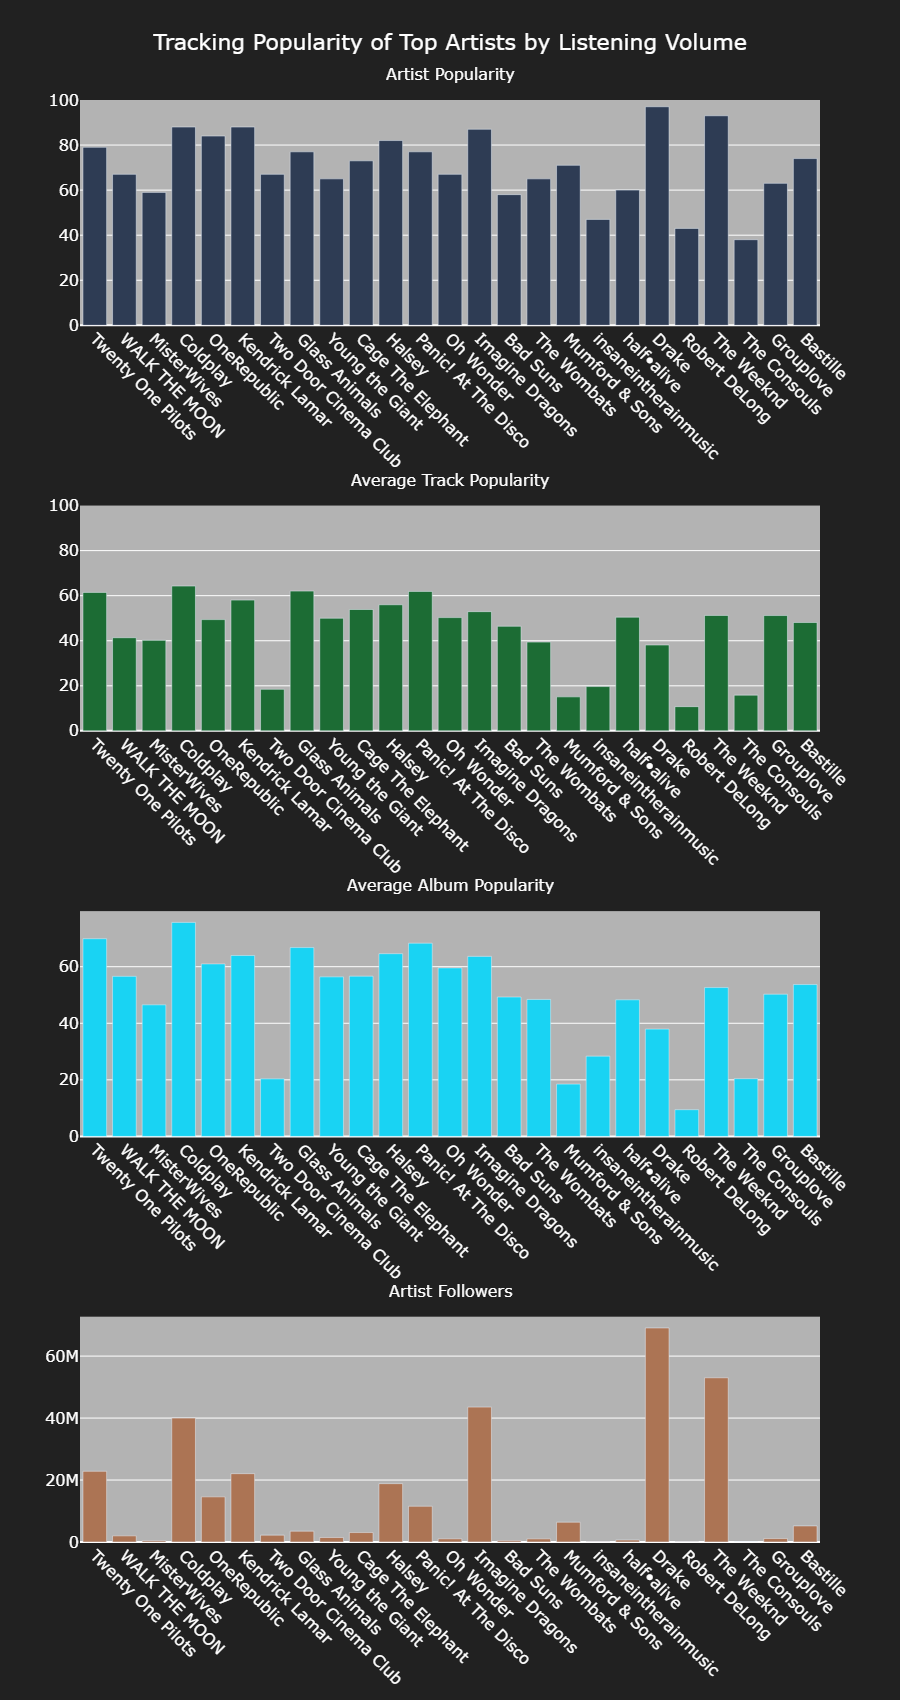

In [170]:
pio.renderers['png'].height, pio.renderers['png'].width = 1700, 900
top_above_avg_artists = above_avg_artists.head(25)

fig = make_subplots(rows=4, cols=1,
                   subplot_titles=("Artist Popularity", "Average Track Popularity", "Average Album Popularity", "Artist Followers"))


fig.add_trace(
    go.Bar(x=top_above_avg_artists['master_metadata_album_artist_name'],
           y=top_above_avg_artists['artist_popularity'],
           name='Artist Popularity',
           marker_color='#2e3c54'),
    row=1, col=1)

fig.add_trace(
    go.Bar(x=top_above_avg_artists['master_metadata_album_artist_name'],
           y=top_above_avg_artists['track_popularity'],
           name='Average Track Popularity',
           marker_color='#1c6c34'),
    row=2, col=1)

fig.add_trace(
    go.Bar(x=top_above_avg_artists['master_metadata_album_artist_name'],
           y=top_above_avg_artists['album_popularity'],
           name='Average Album Popularity',
           marker_color='#19D3F3'),
    row=3, col=1)

fig.add_trace(
    go.Bar(x=top_above_avg_artists['master_metadata_album_artist_name'],
           y=top_above_avg_artists['followers.total'],
           name='Artist Followers',
           marker_color='#ac7454'),
    row=4, col=1)    

fig.update_layout(height=1700, 
                  width=900, 
                  title_x=0.5,
                  font_size=16, 
                  showlegend=False, 
                  title_text='Tracking Popularity of Top Artists by Listening Volume',
                  paper_bgcolor='#212121',
                  plot_bgcolor='#b3b3b3',
                  font_color="white")
fig.update_xaxes(tickangle=45)
fig.update_yaxes(range=[0,100], row=1, col=1)
fig.update_yaxes(range=[0,100], row=2, col=1)
fig.update_annotations(yshift=15)
fig.show()

<AxesSubplot:>

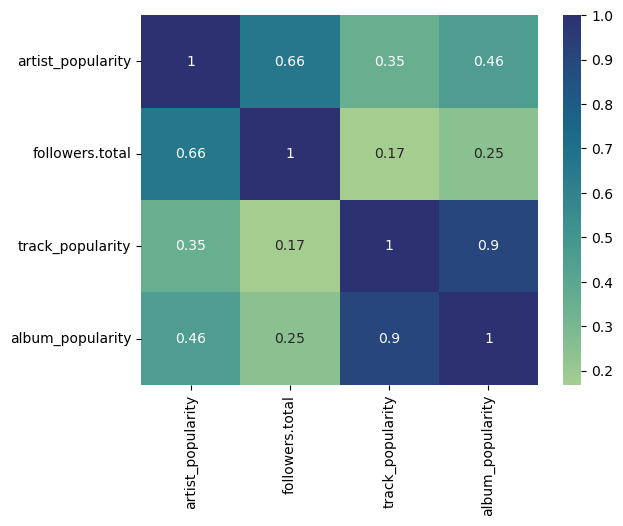

In [171]:
sns.heatmap(df[['artist_popularity', 'followers.total', 'track_popularity', 'album_popularity']].corr(), cmap='crest', annot=True)

There is a considerable jump in popularity for artists I listen to more than the average. This indicates that sometimes, I'll venture out and listen to less-popular artists, but the larger share of my listening is dedicated to artists and tracks that tend to be more popular. 

In both cases, the artists are more popular than the tracks themselves, which shows that I can dive deep into the discography of my top artists. 

I thought that followers would somewhat correlate with popualrity, and it does have a correlation coefficient of 0.65, but the difference in the scale of followers is substantial, in the tens of millions. 
Album popularity and track popularity have nearly perfect positive correlation, which makes sense because most tracks are listened to as a part of an album, and artist singles are also often associated with an album. 

I didn't expect the average track popularity to have such variance. The average track popularity hardly correlates with how popular the artist is, and even less so with the total followers. It doesn't make sense how Drake can be in the 95th percentile of popularity, but sub-40% on track popularity. Perhaps people generally focus on the hits, and not much else. 

### Genres

In [172]:
df['genres'].value_counts()

['modern rock', 'rock']                                                                            10583
['dance rock', 'indie poptimism', 'modern alternative rock', 'modern rock', 'pop rock', 'rock']     3795
[]                                                                                                  3427
['permanent wave', 'pop']                                                                           3212
['piano rock', 'pop']                                                                               3178
                                                                                                   ...  
['american shoegaze', 'dreamo', 'la indie']                                                            1
['garage rock', 'modern blues rock', 'punk blues']                                                     1
['metallic hardcore']                                                                                  1
['otacore', 'scorecore', 'vgm instrumental']           

In [173]:
df['genres'] = df['genres'].apply(eval)

genre_dict = {}
for row in df['genres']:
    for genre in row:
        if genre not in genre_dict:
            genre_dict[genre] = 1
        else:
            genre_dict[genre] += 1

genres_df = pd.DataFrame.from_dict(genre_dict, orient='index').reset_index().rename(columns={'index': 'genre', 0:'times_played'})
genres_df.head()

,genre,times_played
0,dance rock,4388
1,indie poptimism,28191
2,modern alternative rock,34866
3,modern rock,79343
4,pop rock,26144


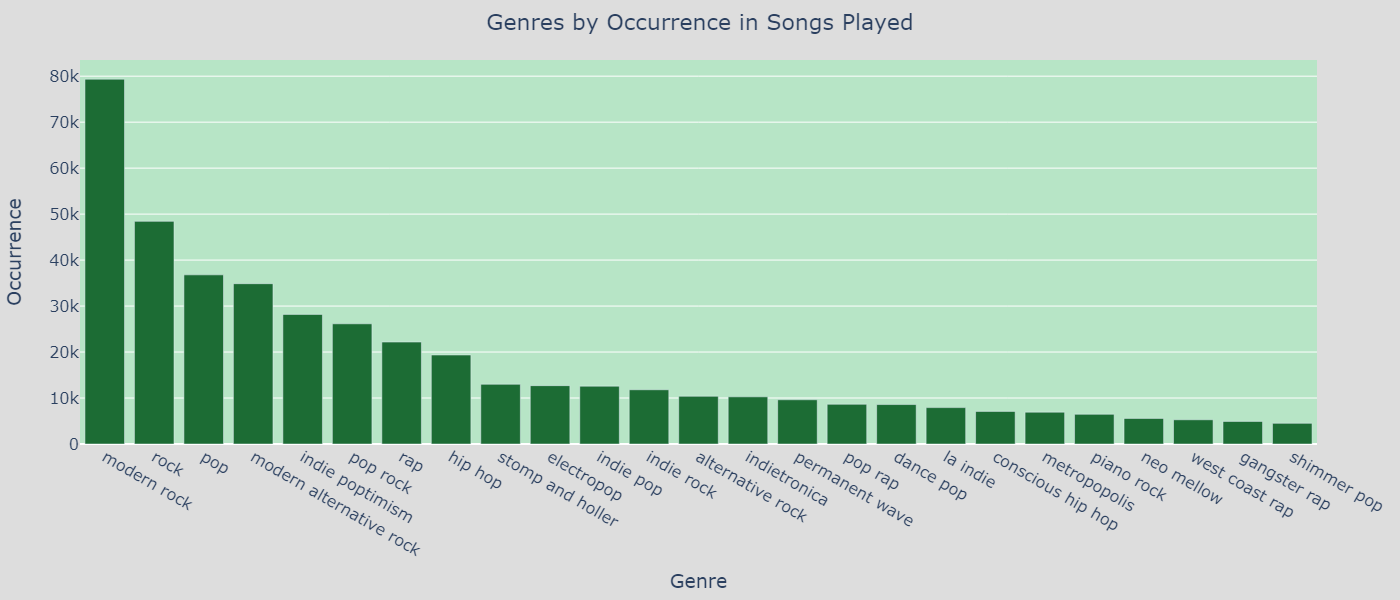

In [174]:
pio.renderers['png'].height, pio.renderers['png'].width = 600, 1400
top_genres = genres_df.sort_values(by='times_played', ascending=False).head(25)

fig = px.bar(top_genres,
            x='genre',
            y='times_played',
            labels={'genre': 'Genre', 'times_played': 'Occurrence'},
            color_discrete_sequence=['#1c6c34'])
fig.update_layout(height=600, 
                width=1400,
                title_text='Genres by Occurrence in Songs Played', 
                title_x=0.5,
                font_size=16,
                xaxis = dict(tickmode = 'linear', tick0 = 0, dtick = 1),
                showlegend=False,
                plot_bgcolor='#b7e5c6',
                paper_bgcolor='#dddddd'
)
fig.show()

I thought I listened to more rap, but I'm not too shocked at the results here. The top five genres seem very similar, and we know from value counts of the list of genres that the combo of 'modern rock' and 'rock' appear more than 11,000 times, and even more when other genres are included.

I know Spotify has playlists dedicated to its many genres. This chart gives me plenty of genres to look into. Maybe I like 'permanent wave' a lot, but just haven't explored it enough. 

## Conclusion

I had a lot of fun with this project, it was introspective and eye-opening. Now I know I'm most likely to be listening to Spotify between 3-5 p.m. on a Tuesday. 

My listening evovled over time to a greater degree than I anticipated. There's much more consistency to my listening volume in the past two years than in any year prior. 

I think I'm most shocked by how much I skip the artists and tracks I like the most. The artist and song with the most listens and minutes played is also the most skipped. I wonder if that's true for other Spotify users.

Also, I'm walking away from this realizing how much contemporary music I listen to. I knew I generally liked following new music, but not to the degree revealed in analyzing release dates.

I've pinpointed my favorite artists, tracks, albums, and genres. I'd love to return to this project down the line to see if any of the identified patterns change in a material way. 

There's a variety of avenues to explore my Spotify listening history further. In part three, I'd like to explore applying machine learning to predict artist popularity, and find song recommendations when given a playlist. 

